# Summary Notebook Presenting Current Findings and Additional Insights

## External Features

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import sys
import os
sys.path.append(os.path.abspath(".."))
from scripts.preproccessing import extend_data, extend_inflation
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import random 
from statsmodels.tsa.stattools import adfuller

POPULATION DATA PROCESSING:

In [ ]:
## Population Data
## Population Projection Data:\n",
population_projection = pd.read_csv("../data/landing/yearly_pop_projection_perSA.csv")

In [ ]:
# Filter for 'Persons' so we only get the total population for each region\,
df_persons = population_projection[population_projection['SEX'] == 'Persons']

# Pivot the DataFrame to get `SA2_NAME` as rows, `YEAR` as columns, and `Total` as values\n
df_pivot = df_persons.pivot_table(index='SA2_NAME', columns='YEAR', values='Total', aggfunc='sum')


In [ ]:
# Read the GeoPackage
population_gdf = gpd.read_file("../data/population/population_extracted/32180_ERP_2023_SA2_GDA2020.gpkg")


In [ ]:
# extract SA2 name and ERP (estimated residential population) for victoria only

population_gdf = population_gdf[population_gdf['State_name_2021'] == 'Victoria']

population_gdf = population_gdf[[ 'SA2_name_2021',
 'ERP_2006',
 'ERP_2007',
 'ERP_2008',
 'ERP_2009',
 'ERP_2010',
 'ERP_2011',
 'ERP_2012',
 'ERP_2013',
 'ERP_2014',
 'ERP_2015',
 'ERP_2016',
 'ERP_2017',
 'ERP_2018',
 'ERP_2019',
 'ERP_2020',
 'ERP_2021',
 'ERP_2022',
 'ERP_2023']]

In [ ]:
population_df = pd.DataFrame(population_gdf).set_index('SA2_name_2021')
population_df.columns = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]

In [ ]:
population_df = population_df.join(df_pivot.loc[:, 2024:2029], how='inner')
population_df.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
Alfredton,6761.0,7034.0,7272.0,7614.0,7894.0,8452.0,9060.0,9714.0,10338.0,11039.0,...,15507,16841,18002,18997,16896,17489,18056,18611,19166,19716
Ballarat,12356.0,12408.0,12480.0,12476.0,12462.0,12365.0,12357.0,12352.0,12327.0,12300.0,...,12196,12071,11938,11809,12302,12296,12279,12252,12223,12189
Buninyong,6037.0,6131.0,6252.0,6431.0,6595.0,6725.0,6854.0,6984.0,7082.0,7191.0,...,7377,7229,7247,7323,8520,8652,8778,8900,9021,9139
Delacombe,5041.0,5206.0,5349.0,5557.0,5699.0,5838.0,6020.0,6267.0,6583.0,6846.0,...,9755,10648,11798,12869,9142,9358,9564,9763,9961,10155
Smythes Creek,3542.0,3594.0,3658.0,3714.0,3774.0,3819.0,3872.0,3914.0,3945.0,3966.0,...,4152,4211,4223,4268,4197,4222,4244,4263,4285,4305


HOMELESSNESS DATA:

In [ ]:
# Reading in the files  for the seperate years

homelessness_df_21 = pd.read_excel('../data/homelessness/homelessness21.xlsx', sheet_name='Table_5.3')
homelessness_df_11 = pd.read_excel('../data/homelessness/homelessness11.xlsx', sheet_name='Table_1')
homelessness_df_16 = pd.read_excel('../data/homelessness/homelessness16.xlsx', sheet_name='Table_5.3')

In [ ]:
# Processing the data for 2021

homelessness_df_21 = homelessness_df_21.loc[775:1375]
homelessness_df_21 = homelessness_df_21[pd.notna(homelessness_df_21['Unnamed: 3'])]
homelessness_df_21 = homelessness_df_21.iloc[:, -2:]
homelessness_df_21.columns = ['SA2_name_2021', 'all_homeless_persons_2021']

In [ ]:
# Processing the data for 2016

homelessness_df_16 = homelessness_df_16.loc[707:1249]
homelessness_df_16 = homelessness_df_16[pd.notna(homelessness_df_16['Unnamed: 3'])]
homelessness_df_16 = homelessness_df_16.iloc[:, -2:]
homelessness_df_16.columns = ['SA2_name_2021', 'all_homeless_persons_2016']

In [ ]:
# Processing the data for 2011

homelessness_df_11 = homelessness_df_11.loc[668:1180]
homelessness_df_11 = homelessness_df_11[pd.notna(homelessness_df_11['Unnamed: 3'])]
homelessness_df_11 = homelessness_df_11.iloc[:, -2:]
homelessness_df_11.columns = ['SA2_name_2021', 'all_homeless_persons_2011']

In [ ]:
# Merging the data for the different years

homelessness_df = homelessness_df_11.merge(homelessness_df_16, on='SA2_name_2021').merge(homelessness_df_21, on='SA2_name_2021')
homelessness_df = homelessness_df.set_index('SA2_name_2021')
homelessness_df.columns = [2011,2016,2021]
homelessness_df.head()

,2011,2016,2021
SA2_name_2021,,,
Buninyong,3,0,43
Delacombe,33,38,43
Smythes Creek,0,0,5
Wendouree - Miners Rest,51,74,93
Creswick - Clunes,17,4,15



Rows with NaN values: []


/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)


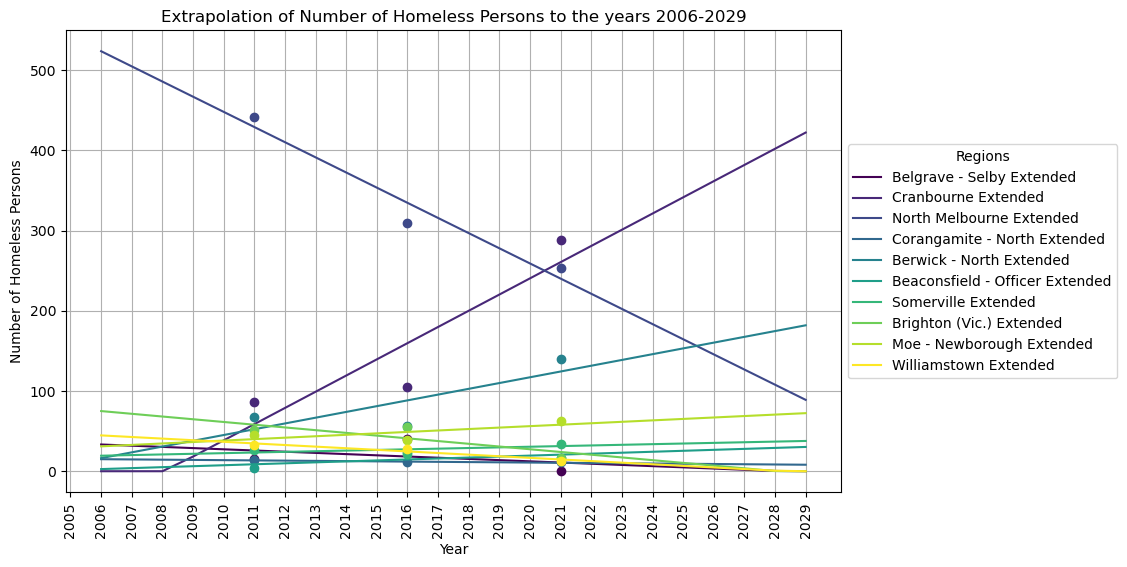

In [ ]:
# Run the function to extrapaloate, interpolate and graph our data
extended_homelessness_df = extend_data(homelessness_df, 'Number of Homeless Persons')

SOCIO ECONOMIC DATA: 

In [ ]:
# Read in the socioeconomic files

socioeconomic_df_21 = pd.read_excel('../data/socioeconomic/socioeconomic21.xlsx', sheet_name='Table 1')
socioeconomic_df_16 = pd.read_excel('../data/socioeconomic/socioeconomic16.xlsx', sheet_name='Table 1')
socioeconomic_df_11 = pd.read_excel('../data/socioeconomic/socioeconomic11.xlsx', sheet_name='Table 2')


In [ ]:
# Processing the data for 2021

socioeconomic_df_21 = socioeconomic_df_21.loc[634:1149]
socioeconomic_df_21 = socioeconomic_df_21.iloc[:, [1, 4]]
socioeconomic_df_21.columns = ['SA2_name_2021', 'Index of Relative Socio-economic Advantage and Disadvantage 2021']

In [ ]:
# Processing the data for 2016

socioeconomic_df_16 = socioeconomic_df_16.loc[565:1019]
socioeconomic_df_16 = socioeconomic_df_16.iloc[:, [1, 4]]
socioeconomic_df_16.columns = ['SA2_name_2021', 'Index of Relative Socio-economic Advantage and Disadvantage 2016']

In [ ]:
# Processing the data for 2011

socioeconomic_df_11 = socioeconomic_df_11.loc[1459:1882]
socioeconomic_df_11 = socioeconomic_df_11.iloc[:, [1, 3]]
socioeconomic_df_11.columns = ['SA2_name_2021', 'Index of Relative Socio-economic Advantage and Disadvantage 2011']

In [ ]:
# Mergind the data

socioeconomic_df = socioeconomic_df_11.merge(socioeconomic_df_16, on='SA2_name_2021').merge(socioeconomic_df_21, on='SA2_name_2021')

In [ ]:
# Formatting the data for extrapolation

socioeconomic_df.rename(columns={
    'Index of Relative Socio-economic Advantage and Disadvantage 2011': 2011,
    'Index of Relative Socio-economic Advantage and Disadvantage 2016': 2016,
    'Index of Relative Socio-economic Advantage and Disadvantage 2021': 2021
}, inplace=True)
socioeconomic_df.set_index('SA2_name_2021', inplace=True)


Rows with NaN values: []


/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)


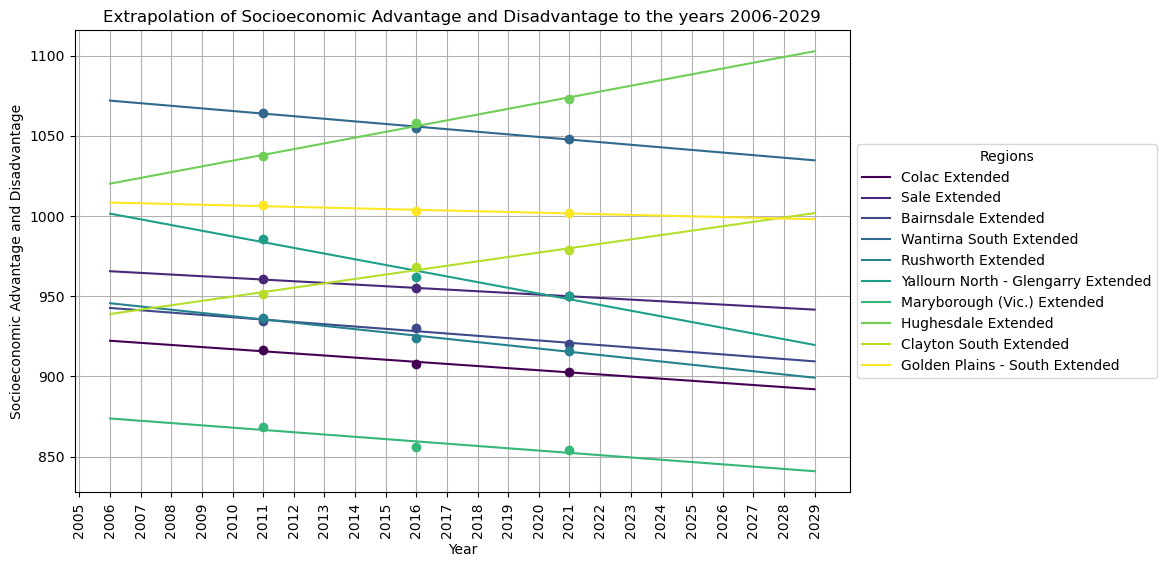

In [ ]:
# Run the function to extrapaloate, interpolate and graph our data
extended_socioeconomic_df = extend_data(socioeconomic_df, 'Socioeconomic Advantage and Disadvantage')

INFLATION PROCESSING:

During this seciton we must:
a. extract housing CPI index
b. extract the overall CPI with housing removed
as a measure of all other inflation this will be best for analysis to keep both variables as independent as possible

In [ ]:
# Read in our different sorts of data
housing_cpi_df = pd.read_excel('../data/inflation/inflation.xlsx', sheet_name='Data1')
excluding_housing_cpi_df = pd.read_excel('../data/inflation/inflation.xlsx', sheet_name='Data2')

# Take only the columns we want
housing_cpi_df = housing_cpi_df[['Unnamed: 0','Index Numbers ;  Housing ;  Melbourne ;']]
excluding_housing_cpi_df = excluding_housing_cpi_df[['Unnamed: 0','Index Numbers ;  All groups CPI excluding Housing ;  Melbourne ;']]
housing_cpi_df = housing_cpi_df.rename(columns={'Unnamed: 0': "quarter"})

# Join the datasets and make the data yearly instead of quarterly
inflation_df = pd.concat([housing_cpi_df,excluding_housing_cpi_df],axis=1).drop('Unnamed: 0', axis=1).dropna().iloc[9:].rename(columns={'Index Numbers ;  Housing ;  Melbourne ;': "housing_index", 'Index Numbers ;  All groups CPI excluding Housing ;  Melbourne ;': 'CPI_without_housing'})
inflation_df['Year'] = pd.to_datetime(inflation_df['quarter']).dt.year
yearly_avg = inflation_df.groupby('Year')[['housing_index', 'CPI_without_housing']].mean()

# Transpose the DataFrame so that 'Year' becomes the columns, and we have rows for housing_index and CPI_without_housing
new_inflation_df = yearly_avg.T.loc[:, 2006:2024]


Rows with NaN values: []


/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:364: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)


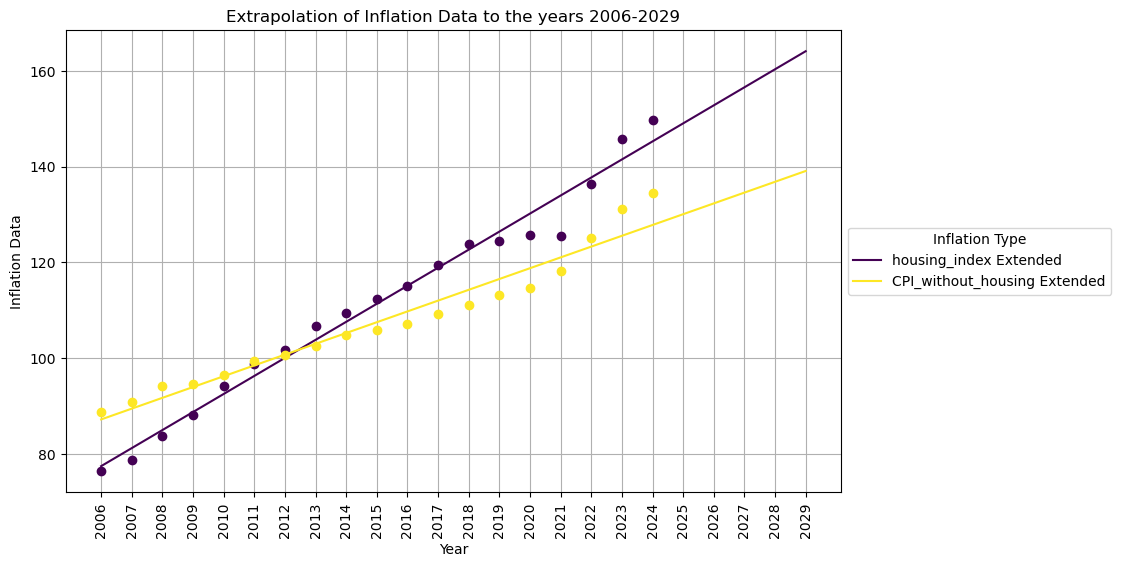

In [ ]:
# Run the function to extrapaloate, interpolate and graph our data
extended_inflation_df = extend_inflation(new_inflation_df, 'Inflation Data')

In [ ]:
# split our inflation data into two seperate dataframes

extended_housing_index_df = extended_inflation_df.loc[['housing_index']]
extended_cpi_without_housing_df = extended_inflation_df.loc[['CPI_without_housing']]

POPULATION DISTRIBUTIONS:

In [ ]:
# Read in our population data
pop_dist_df = pd.read_excel('../data/population_dist/population_dist.xlsx', sheet_name='Table 1')

In [ ]:
# Retrieve only the neccessary columns
pop_dist_df = pop_dist_df.loc[9879:14576]
pop_dist_df = pop_dist_df.iloc[:, [1, 2, 4, 9, 131, 142, 156]]
pop_dist_df.columns = ['SA2_name_2021', 'Year', 'Population Density', 'Median Age', 'Percentage Aboriginal and Torres Straight Islander', 'Percentage Overseas Born', 'Percentage Australian Citizen']

In [ ]:
# Split all of the data into seperate dfs and pivot the axis
population_density_df = pop_dist_df.pivot(index='SA2_name_2021', columns='Year', values='Population Density')
median_age_df = pop_dist_df.pivot(index='SA2_name_2021', columns='Year', values='Median Age')
percentage_aboriginal_torres_straight_df = pop_dist_df.pivot(index='SA2_name_2021', columns='Year', values='Percentage Aboriginal and Torres Straight Islander')
percentage_overseas_born_df = pop_dist_df.pivot(index='SA2_name_2021', columns='Year', values='Percentage Overseas Born')
percentage_australian_citizen_df = pop_dist_df.pivot(index='SA2_name_2021', columns='Year', values='Percentage Australian Citizen')

/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:210: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True) # replace '-' values with NaN
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:225: SettingWithCopyWarning: 
A value is tryin


Rows with NaN values: ['Alps - East', 'Alps - West', 'Lake King', 'Royal Botanic Gardens Victoria', 'West Melbourne - Industrial', 'Wilsons Promontory']


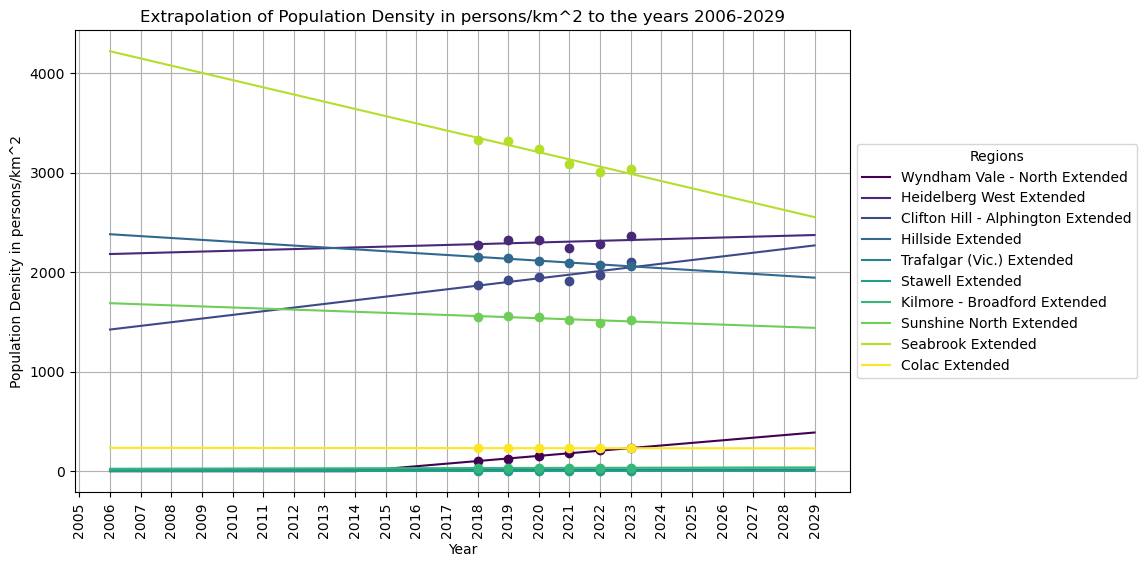

/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:210: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True) # replace '-' values with NaN
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:225: SettingWithCopyWarning: 
A value is tryin


Rows with NaN values: ['Alps - East', 'Lake King', 'Royal Botanic Gardens Victoria', 'West Melbourne - Industrial']


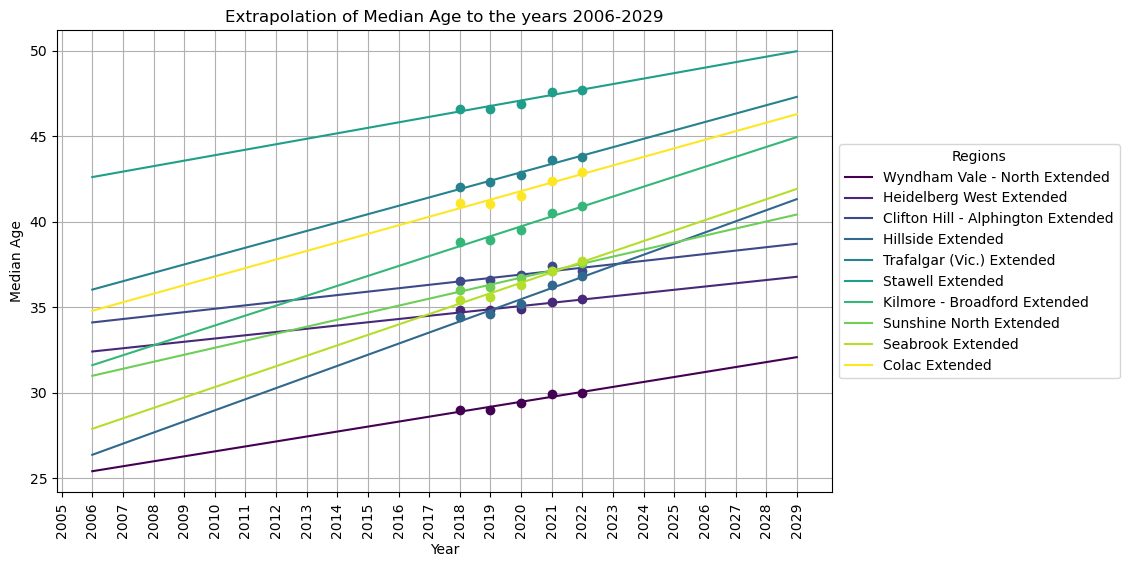

/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:210: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True) # replace '-' values with NaN
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:225: SettingWithCopyWarning: 
A value is tryin


Rows with NaN values: ['Alps - East', 'Alps - West', 'Braeside', 'Clyde North - North', 'Clyde North - South', 'Cobblebank - Strathtulloh', 'Craigieburn - North West', 'Cranbourne East - South', 'Essendon Airport', 'Flemington Racecourse', 'Fraser Rise - Plumpton', 'French Island', 'Ivanhoe East - Eaglemont', 'Keysborough - South', 'Lake King', 'Melbourne Airport', 'Melbourne CBD - North', 'Moorabbin Airport', 'Port Melbourne Industrial', 'Royal Botanic Gardens Victoria', 'Tarneit (West) - Mount Cottrell', 'Tarneit - North', 'West Melbourne - Industrial', 'Wilsons Promontory', 'Wollert']


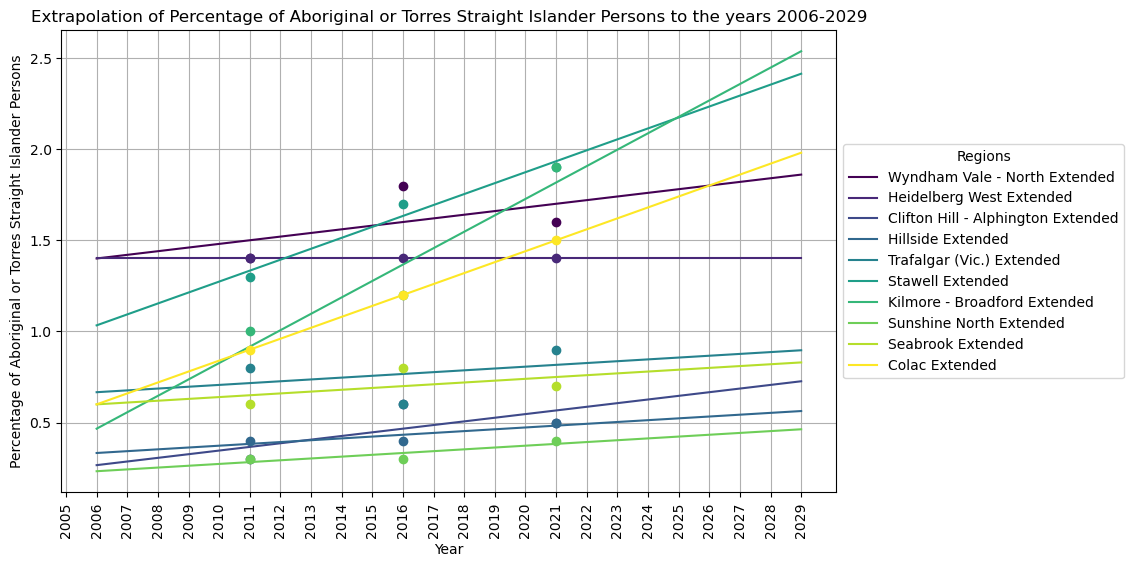

/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:210: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True) # replace '-' values with NaN
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:225: SettingWithCopyWarning: 
A value is tryin


Rows with NaN values: ['Alps - East', 'Alps - West', 'Essendon Airport', 'Lake King', 'Moorabbin Airport', 'Royal Botanic Gardens Victoria', 'West Melbourne - Industrial', 'Wilsons Promontory']


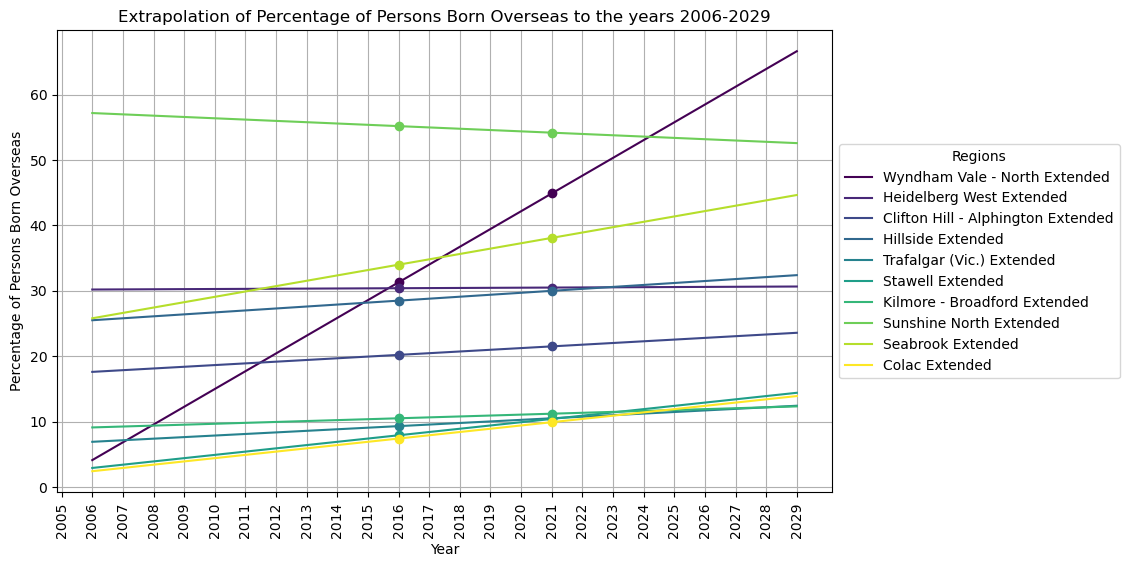

/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:210: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True) # replace '-' values with NaN
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:225: SettingWithCopyWarning: 
A value is tryin


Rows with NaN values: ['Alps - East', 'Alps - West', 'Braeside', 'Clyde North - North', 'Essendon Airport', 'Flemington Racecourse', 'French Island', 'Lake King', 'Moorabbin Airport', 'Royal Botanic Gardens Victoria', 'West Melbourne - Industrial', 'Wilsons Promontory']


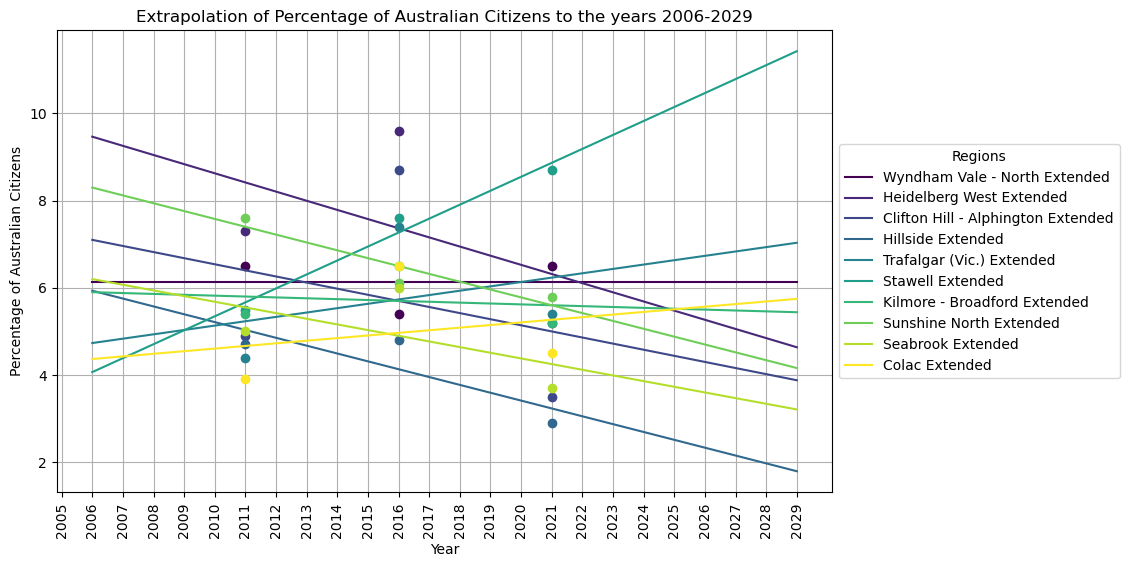

In [ ]:
# Run the function to interpolate, extrapolate and plot all of our data
extended_population_density_df = extend_data(population_density_df, 'Population Density in persons/km^2')
extended_median_age_df = extend_data(median_age_df, 'Median Age')
extended_percentage_aboriginal_torres_straight_df = extend_data(percentage_aboriginal_torres_straight_df, 'Percentage of Aboriginal or Torres Straight Islander Persons')
extended_percentage_overseas_born_df = extend_data(percentage_overseas_born_df, 'Percentage of Persons Born Overseas')
extended_percentage_australian_citizen_df = extend_data(percentage_australian_citizen_df, 'Percentage of Australian Citizens')

BUSINESS DATA:

In [ ]:
# Read in the data
business_df = pd.read_excel('../data/business/business.xlsx', sheet_name='Table 1')

In [ ]:
# Retrieve required features
business_df = business_df.loc[9879:14576]
business_df = business_df.iloc[:, [1, 2, 7]]
business_df.columns = ['SA2_name_2021', 'Year', 'Total Number of Businesses']

# Transform the data to the correct form
business_df = business_df.pivot(index='SA2_name_2021', columns='Year', values='Total Number of Businesses')

/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:210: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True) # replace '-' values with NaN
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:225: SettingWithCopyWarning: 
A value is tryin


Rows with NaN values: ['Alps - East', 'Lake King', 'Wilsons Promontory']


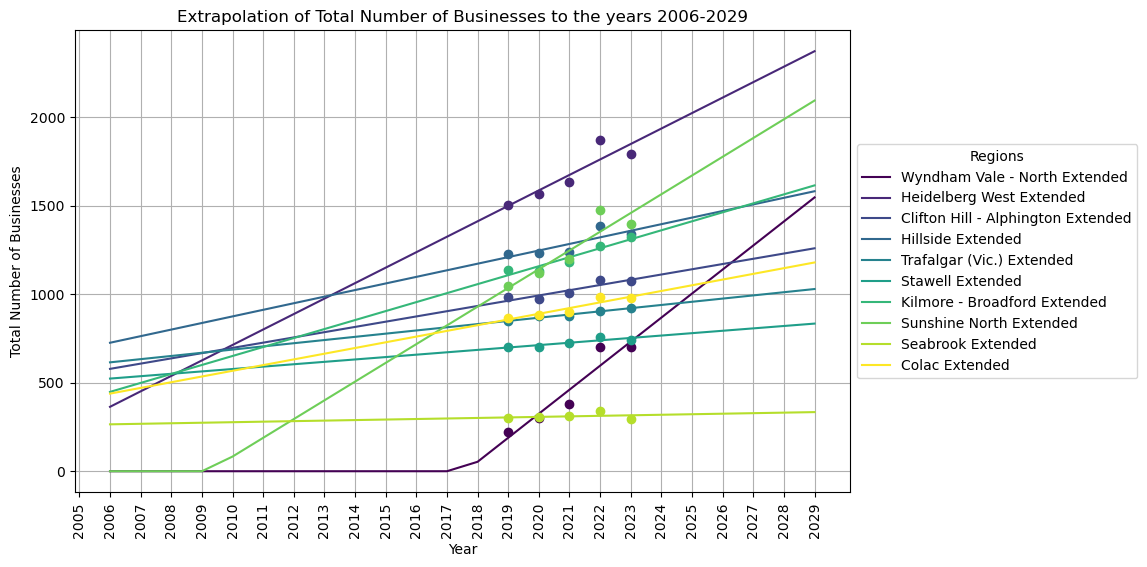

In [ ]:
# Run the function to interpolate, extrapolate and plot
extended_business_df = extend_data(business_df, 'Total Number of Businesses')

INCOME DATA:

In [2]:
# Read in the data 
income_df = pd.read_excel('../data/income/income.xlsx', sheet_name='Table 1')

# Format correctly and take relevant features
income_df = income_df.loc[8782:12957]
income_df = income_df.iloc[:, [1, 2, 30]]
income_df.columns = ['SA2_name_2021', 'Year', 'Median Total Income']
income_df = income_df.pivot(index='SA2_name_2021', columns='Year', values='Median Total Income')

/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:210: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True) # replace '-' values with NaN
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
/Users/charlieamad/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:225: SettingWithCopyWarning: 
A value is tryin


Rows with NaN values: ['Alps - East', 'Avondale Heights', 'Ballarat East - Warrenheip', 'Ballarat North - Invermay', 'Baranduda - Leneva', 'Barwon Heads - Armstrong Creek', 'Beaconsfield - Officer', 'Berwick - South East', 'Berwick - South West', 'Brookfield', 'Brunswick - North', 'Brunswick - South', 'Bunyip - Garfield', 'Canadian - Mount Clear', 'Charlemont', 'Clayton (North) - Notting Hill', 'Clayton - Central', 'Clyde North - North', 'Clyde North - South', 'Cobblebank - Strathtulloh', 'Coburg - East', 'Coburg - West', 'Corio - Lovely Banks', 'Craigieburn - North West', 'Craigieburn - West', 'Cranbourne East - North', 'Cranbourne East - South', 'Cranbourne North - East', 'Cranbourne North - West', 'Dandenong - North', 'Dandenong - South', 'Deer Park', 'Derrimut', 'Diggers Rest', 'Doreen - North', 'Doreen - South', 'Essendon (West) - Aberfeldie', 'Essendon - East', 'Essendon Airport', 'Eynesbury - Exford', 'Fraser Rise - Plumpton', 'Glenroy - East', 'Glenroy - West', 'Grovedale - Mo

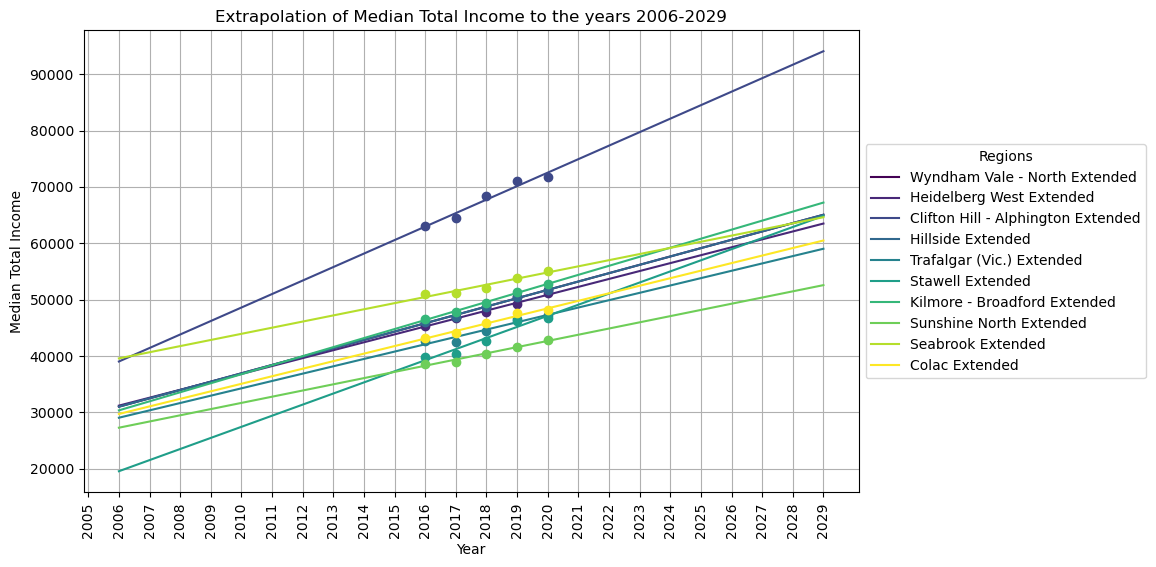

In [ ]:
# Run the function to interpolate, extrapolate and plot
extended_income_df = extend_data(income_df, 'Median Total Income')

UNEMPLOYMENT DATA:

In [ ]:
# Read in the data
unemployment_df = pd.read_excel('../data/unemployment/unemployment.xlsx', sheet_name='Table 1')

# Transform and ensure relevant features
unemployment_df = unemployment_df.loc[8782:12957]
unemployment_df = unemployment_df.iloc[:, [1, 2, 77]]
unemployment_df.columns = ['SA2_name_2021', 'Year', 'Unemployment Rate']
unemployment_df = unemployment_df.pivot(index='SA2_name_2021', columns='Year', values='Unemployment Rate')

/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:210: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True) # replace '-' values with NaN
/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:225: SettingWithCopyWarning: 
A value is trying t


Rows with NaN values: ['Alps - East', 'Alps - West', 'Braeside', 'Clyde North - North', 'Essendon Airport', 'Flemington Racecourse', 'French Island', 'Lake King', 'Melbourne Airport', 'Moorabbin Airport', 'Royal Botanic Gardens Victoria', 'Truganina - North', 'West Melbourne - Industrial', 'Wilsons Promontory']


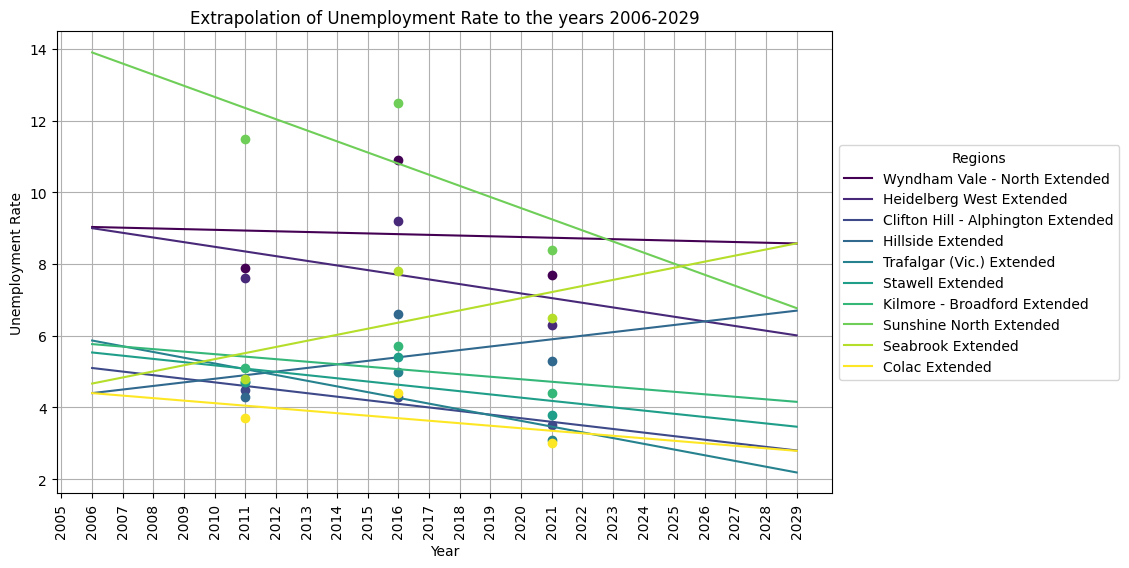

In [ ]:
# Run our function to interpolate, extrapolate and plot
extended_unemployment_df = extend_data(unemployment_df, 'Unemployment Rate')

COMMUNITY DATA:

In [ ]:
# Read in data
community_df = pd.read_excel('../data/community/community.xlsx', sheet_name='Table 1')

# Transform and ensure relevant features
community_df = community_df.loc[8782:12957]
community_df = community_df.iloc[:, [1, 2, 29, 49, 75]]
community_df.columns = ['SA2_name_2021', 'Year', 'Average Household Size', 'Median Weekly Rent', 'Percentage Rental Properties']
ave_household_size_df = community_df.pivot(index='SA2_name_2021', columns='Year', values='Average Household Size')
median_rent_df = community_df.pivot(index='SA2_name_2021', columns='Year', values='Median Weekly Rent')
percentage_rentals_df = community_df.pivot(index='SA2_name_2021', columns='Year', values='Percentage Rental Properties')

/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:210: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True) # replace '-' values with NaN
/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:225: SettingWithCopyWarning: 
A value is trying t


Rows with NaN values: ['Alps - East', 'Essendon Airport', 'Lake King', 'Moorabbin Airport', 'West Melbourne - Industrial']


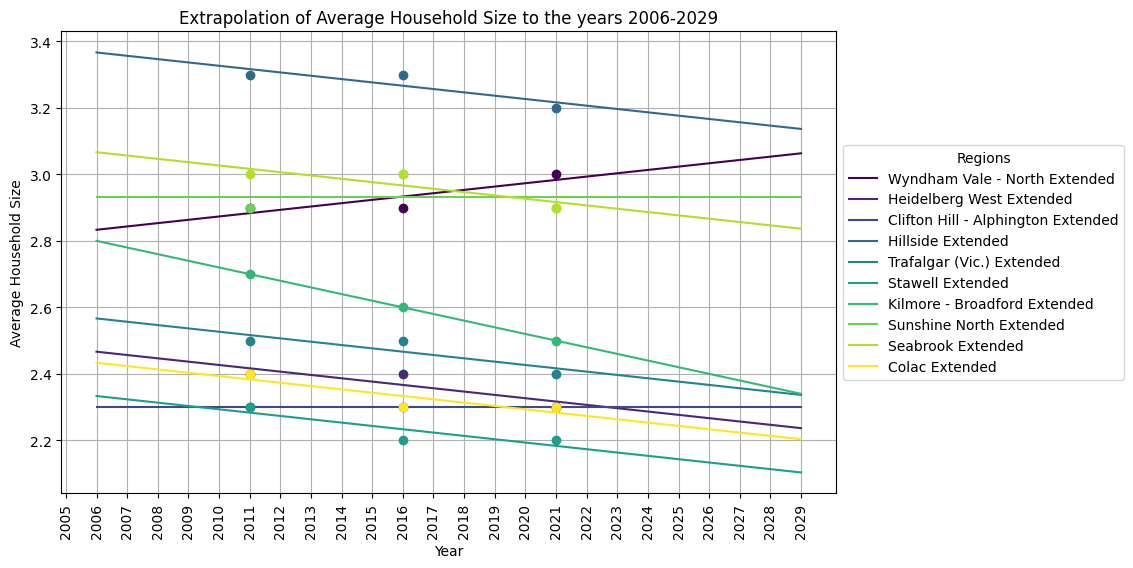

/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:210: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True) # replace '-' values with NaN
/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:225: SettingWithCopyWarning: 
A value is trying t


Rows with NaN values: ['Alps - East', 'Essendon Airport', 'Lake King', 'Moorabbin Airport', 'Royal Botanic Gardens Victoria', 'West Melbourne - Industrial']


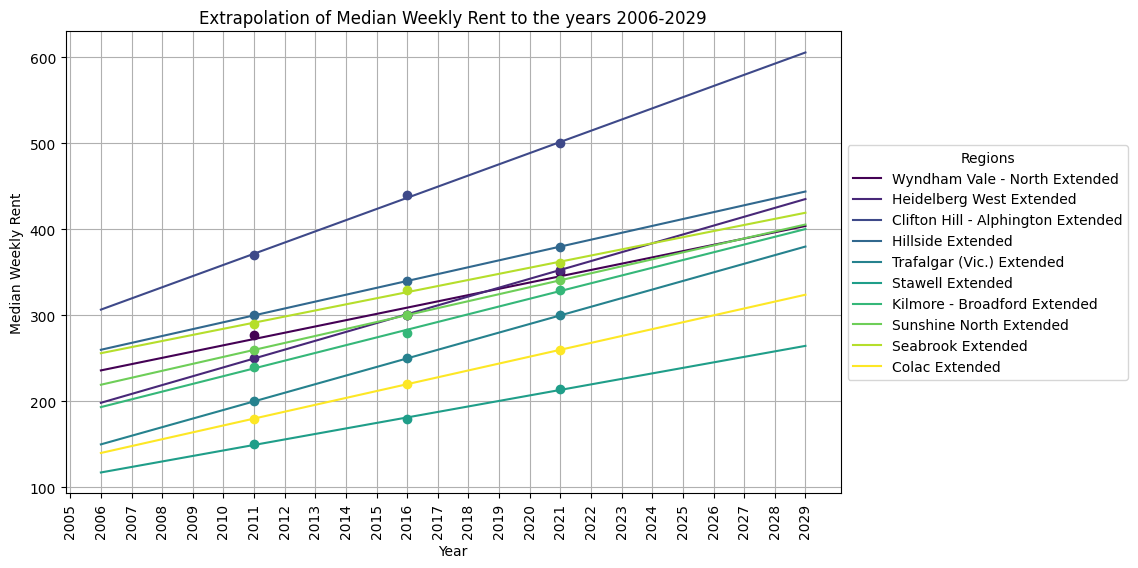

/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:210: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True) # replace '-' values with NaN
/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/scripts/preproccessing.py:225: SettingWithCopyWarning: 
A value is trying t


Rows with NaN values: ['Alps - East', 'Alps - West', 'Braeside', 'Clyde North - North', 'Essendon Airport', 'French Island', 'Lake King', 'Melbourne Airport', 'Moorabbin Airport', 'Royal Botanic Gardens Victoria', 'Tarneit - North', 'Truganina - North', 'West Melbourne - Industrial']


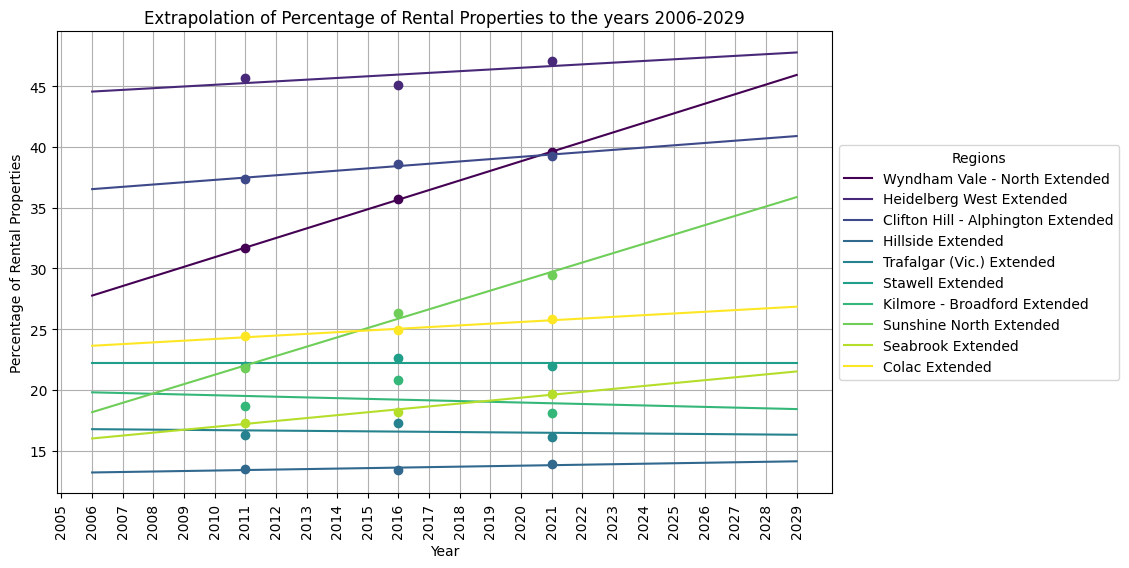

In [ ]:
# Run the function to interpolate, extrapolate and plot the data
extended_ave_household_size_df = extend_data(ave_household_size_df, 'Average Household Size')
extended_median_rent_df = extend_data(median_rent_df, 'Median Weekly Rent')
extended_percentage_rentals_df = extend_data(percentage_rentals_df, 'Percentage of Rental Properties')

## Calculating Driving Distances

In [ ]:
import requests
import zipfile
import io
import geopandas as gpd
from openrouteservice import Client
import json
import pandas as pd
from shapely.geometry import Point
import ast
import time
import os
import sys
sys.path.append('../')
from scripts.utils import download_file, extract_zip

In [ ]:
# Initialize OpenRouteService client with your API key
api_key = '5b3ce3597851110001cf62483425e548d4ed4c2ca4a6b5814be96094'
client = Client(key=api_key)

### Creating Train Station Isochrones

In [ ]:
# THIS TAKES A WHILE. EXPECT IT TO BE ABOUT 13 MINUTES

def generate_isochrones(train_gdf, client, processed_stations, output_file, interval=600):  # 600 seconds = 10 minutes
    isochrone_features = []  # To store all isochrone features
    
    for index, train_station in train_gdf.iterrows():
        station_id = train_station['stop_id']  # Use STOP_ID
        station_name = train_station['stop_name']  # Use STOP_NAME
        lat, lon = train_station.geometry.y, train_station.geometry.x
        
        # Skip if station already processed
        if station_id in processed_stations:
            continue
        
        print(f"Processing: {station_id} - {station_name} (Lat: {lat}, Lon: {lon})")
        
        # Isochrone parameters for 10 minutes (600 seconds) driving time
        params_iso = {
            'profile': 'driving-car',
            'intervals': [interval],  # Single interval of 10 minutes
            'locations': [[lon, lat]],
        }
        
        try:
            # Fetch isochrones
            isochrones = client.isochrones(**params_iso)
            
            # Convert the isochrone to a GeoJSON Feature
            for feature in isochrones['features']:
                isochrone_feature = {
                    'type': 'Feature',
                    'geometry': feature['geometry'],  # Isochrone geometry
                    'properties': {
                        'station_id': station_id,  # Use STOP_ID
                        'station_name': station_name,  # Use STOP_NAME
                        'interval': interval,  # 10-minute interval
                        'latitude': lat,
                        'longitude': lon
                    }
                }
                isochrone_features.append(isochrone_feature)
            
            # Mark station as processed
            processed_stations.append(station_id)

            # Delay to prevent hitting the rate limit
            delay = 3
            time.sleep(delay)
            
        except Exception as e:
            print(f"Error processing station {station_id} - {station_name}: {e}")
    
    # Print the count and sample of isochrone features
    print(f"Isochrone features count: {len(isochrone_features)}")
    print("Sample isochrone features:", json.dumps(isochrone_features[:1], indent=2))
    
    # Create a GeoJSON structure to hold all isochrones
    isochrone_collection = {
        'type': 'FeatureCollection',
        'features': isochrone_features
    }
    
    # Ensure the directory exists
    output_directory = os.path.dirname(output_file)
    os.makedirs(output_directory, exist_ok=True)
    
    # Save the entire collection to a single GeoJSON file
    with open(output_file, 'w') as f:
        json.dump(isochrone_collection, f, indent=2)
    
    print(f"All isochrones saved to {output_file}")

# Prepare test parameters
processed_stations = []

# Run the test
generate_isochrones(
    train_gdf, 
    client, 
    processed_stations, 
    '../data/curated/isochrones/isochrones.geojson',
    interval=600
)


Processing: 19970 - Royal Park Railway Station (Parkville) (Lat: -37.7811929725527, Lon: 144.95230120580877)
Processing: 19971 - Flemington Bridge Railway Station (North Melbourne) (Lat: -37.788139984393844, Lon: 144.93932321237276)
Processing: 19972 - Macaulay Railway Station (North Melbourne) (Lat: -37.79426700459872, Lon: 144.93616600406753)
Processing: 19973 - North Melbourne Railway Station (West Melbourne) (Lat: -37.80741897361899, Lon: 144.94257002890663)
Processing: 19974 - Clifton Hill Railway Station (Clifton Hill) (Lat: -37.78865703363607, Lon: 144.9954169601631)
Processing: 19975 - Victoria Park Railway Station (Abbotsford) (Lat: -37.79915796626723, Lon: 144.9944510689111)
Processing: 19976 - Collingwood Railway Station (Abbotsford) (Lat: -37.80452601640281, Lon: 144.99375014165992)
Processing: 19977 - North Richmond Railway Station (Richmond) (Lat: -37.8103979761548, Lon: 144.9924998535909)
Processing: 19978 - West Richmond Railway Station (Richmond) (Lat: -37.814949005848

In [ ]:

# Function to get distance using ORS API
def get_distance(lat1, lon1, lat2, lon2):
    # Coordinates for rental property and train station
    coordinates = [[lon1, lat1], [lon2, lat2]]
    
    try:
        # Request route
        route = client.directions(coordinates=coordinates, profile='driving-car', format='geojson')
        # Get distance in meters
        distance = route['features'][0]['properties']['segments'][0]['distance']
        return distance / 1000  # Convert to kilometers
    except Exception as e:
        print(f"Error occurred: {e}")
        return None  # Handle the case where API call fails

# Apply the function to DataFrame with a delay
def apply_distance_with_delay(row):
    distance = get_distance(row['latitude_left'], row['longitude_left'], row['latitude_right'], row['longitude_right'])
    time.sleep(2)  # Adding a delay of 1 second between requests
    return distance

# Apply with delay
joined_gdf['distance_km'] = joined_gdf.apply(apply_distance_with_delay, axis=1)


In [ ]:
# This process was repeated for calculating the driving distances to:
# - The nearest major city
# - The nearest place of education
# - The nearest park or garden
# - The nearest healthcare facility

## Modelling

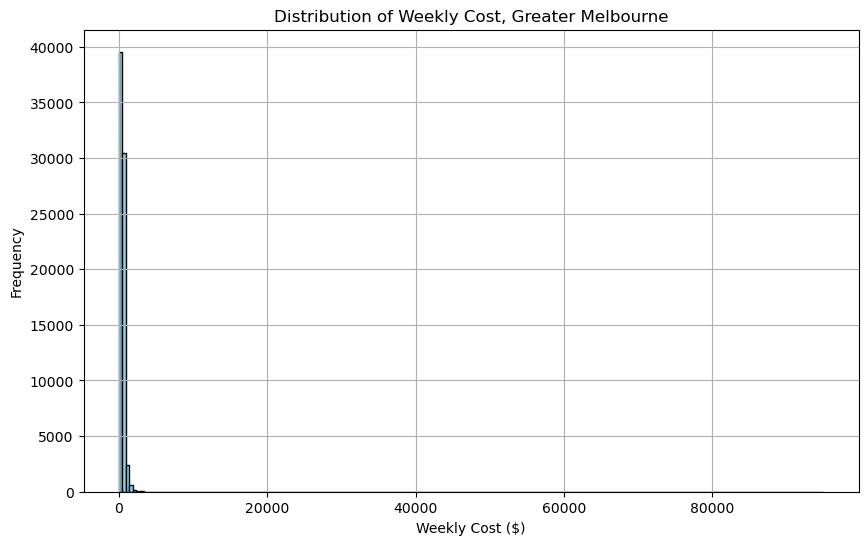

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(greater_melbourne['weekly_cost'], bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Cost, Greater Melbourne')
plt.xlabel('Weekly Cost ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

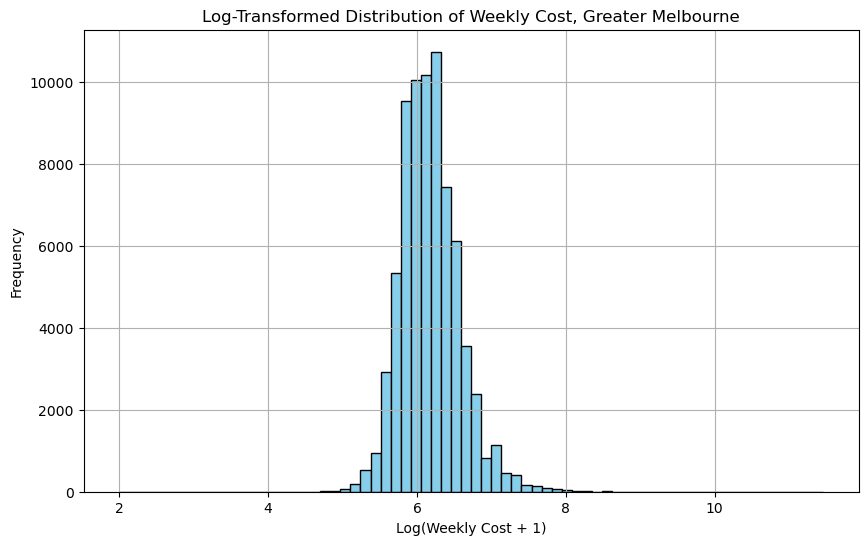

In [ ]:
# Log transformation of the 'weekly_cost' column
log_weekly_cost = np.log1p(greater_melbourne['weekly_cost'])

# Plot the log-transformed distribution
plt.figure(figsize=(10, 6))
plt.hist(log_weekly_cost, bins=70, color='skyblue', edgecolor='black')
plt.title('Log-Transformed Distribution of Weekly Cost, Greater Melbourne')
plt.xlabel('Log(Weekly Cost + 1)')
plt.ylabel('Frequency')
plt.grid(True)

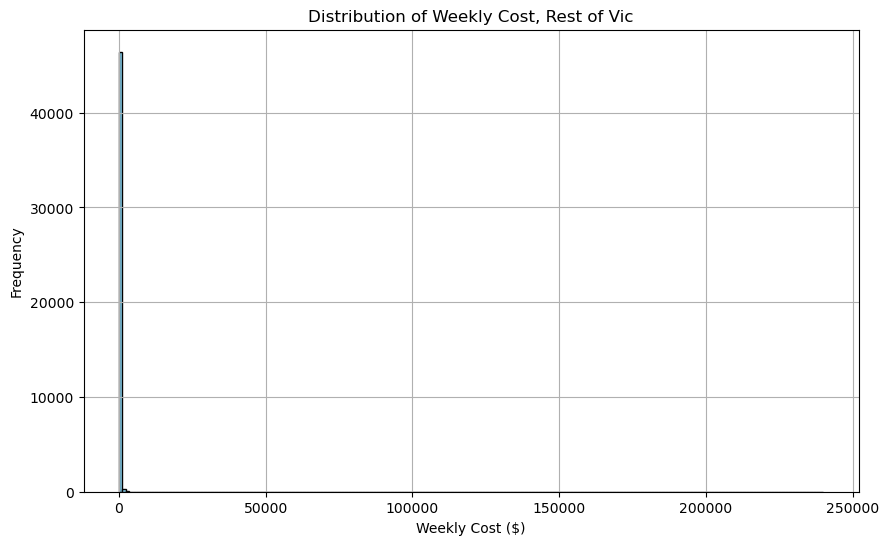

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(rest_of_vic['weekly_cost'], bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Cost, Rest of Vic')
plt.xlabel('Weekly Cost ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

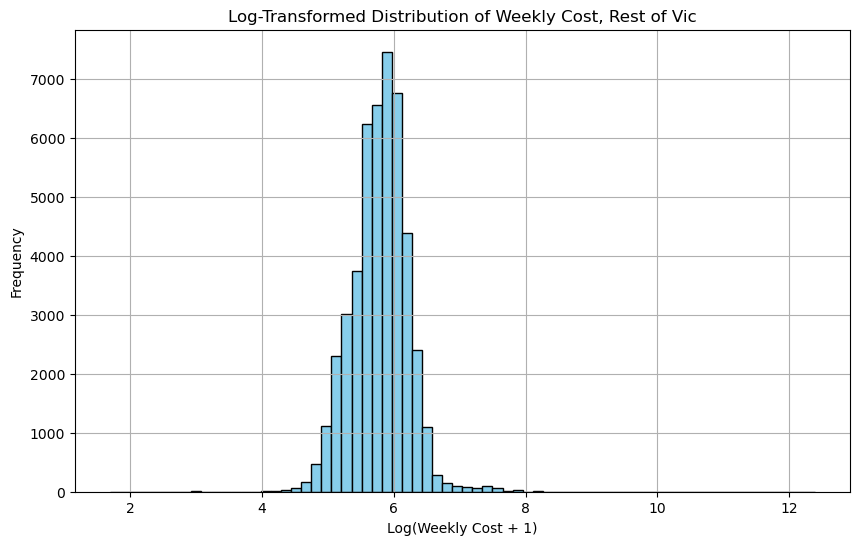

In [ ]:
# Log transformation of the 'weekly_cost' column
log_weekly_cost = np.log1p(rest_of_vic['weekly_cost'])

# Plot the log-transformed distribution
plt.figure(figsize=(10, 6))
plt.hist(log_weekly_cost, bins=70, color='skyblue', edgecolor='black')
plt.title('Log-Transformed Distribution of Weekly Cost, Rest of Vic')
plt.xlabel('Log(Weekly Cost + 1)')
plt.ylabel('Frequency')
plt.grid(True)

### GREATER MELBOURNE MODELS:

In [ ]:
# REMOVING TOP 5% SO WE ARE ONLY IN THE 95% RANGE

threshold = greater_melbourne['weekly_cost'].quantile(0.95)

# Step 2: Filter the DataFrame to keep only the data less than or equal to the threshold
greater_melbourne = greater_melbourne[greater_melbourne['weekly_cost'] <= threshold]

Linear Regression MSE (log-transformed scale): 0.032651782443582945
Linear Regression MSE (original scale): 8373.816532272693
Linear Regression RMSE (original scale): 91.50855988525169


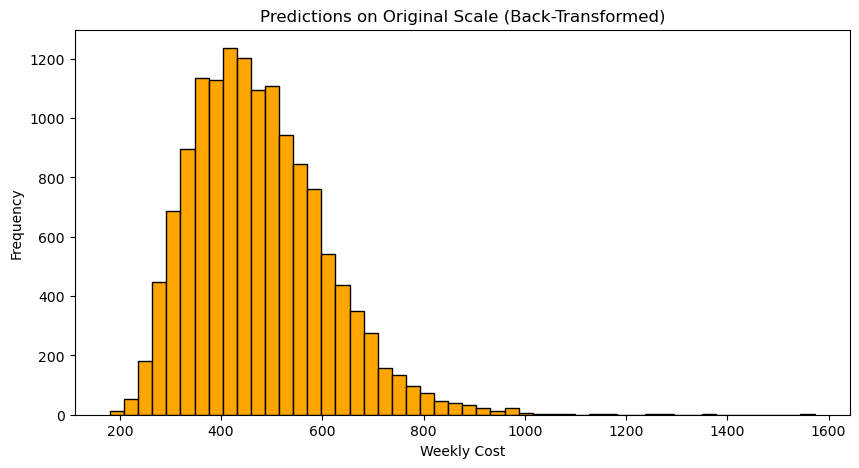


Feature Importances (Coefficients):
Feature: beds, Coefficient: 0.1454
Feature: baths, Coefficient: 0.0694
Feature: parking, Coefficient: 0.0175
Feature: dist_to_city, Coefficient: -0.0142
Feature: dist_to_education, Coefficient: 0.0022
Feature: dist_to_parks_and_gardens, Coefficient: 0.0080
Feature: dist_to_train_station, Coefficient: -0.0095
Feature: dist_to_healthcare, Coefficient: 0.0124
Feature: num_homeless_persons, Coefficient: -0.0034
Feature: avg_household_size, Coefficient: -0.0485
Feature: num_businesses, Coefficient: 0.0157
Feature: median_income, Coefficient: 0.0070
Feature: median_age, Coefficient: 0.0334
Feature: median_weekly_rent, Coefficient: 0.0893
Feature: percent_aboriginal_torres_strait_islander, Coefficient: -0.0400
Feature: percent_au_citizen, Coefficient: 0.0016
Feature: percent_overseas_born, Coefficient: -0.0258
Feature: percent_rental_properties, Coefficient: 0.0755
Feature: population, Coefficient: 0.1089
Feature: percent_unemployed, Coefficient: -0.0149
F

In [ ]:
# REGULAR  LINEAR REGRESSION: 

# Step 1: Drop NaN values
greater_melbourne = greater_melbourne.dropna()

# Step 2: Separate features (X) and target variable (y) with log transformation
X_gm = greater_melbourne.drop(columns=['weekly_cost'])
y_gm_log = np.log1p(greater_melbourne['weekly_cost'])  # log1p for better handling of small values

# Step 3: Scale the features
scaler = StandardScaler()
X_gm_scaled = scaler.fit_transform(X_gm)

# Step 4: Split the dataset into training and testing sets
X_train_gm, X_test_gm, y_train_gm, y_test_gm = train_test_split(X_gm_scaled, y_gm_log, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_gm, y_train_gm)

# Step 6: Make predictions on the test set (log-transformed)
y_pred_lr_gm = lr_model.predict(X_test_gm)

# Step 7: Evaluate the model on the log-transformed data (MSE in log scale)
mse_log = mean_squared_error(y_test_gm, y_pred_lr_gm)
print('Linear Regression MSE (log-transformed scale):', mse_log)

# Step 8: Back-transform the predictions and true values to the original scale
y_pred_lr_gm_orig = np.expm1(y_pred_lr_gm)  # Convert predictions back to the original scale
y_test_gm_orig = np.expm1(y_test_gm)        # Convert true values back to the original scale

# Step 9: Calculate MSE and RMSE on the original scale
mse_original = mean_squared_error(y_test_gm_orig, y_pred_lr_gm_orig)
rmse_original = np.sqrt(mse_original)
print('Linear Regression MSE (original scale):', mse_original)
print('Linear Regression RMSE (original scale):', rmse_original)

# Step 11: Plot distribution of predictions on original scale (back-transformed)
plt.figure(figsize=(10,5))
plt.hist(y_pred_lr_gm_orig, bins=50, color='orange', edgecolor='black')
plt.title('Predictions on Original Scale (Back-Transformed)')
plt.xlabel('Weekly Cost')
plt.ylabel('Frequency')
plt.show()

# Step 12: Coefficients with feature names
importance_lr = lr_model.coef_
feature_names = X_gm.columns

print("\nFeature Importances (Coefficients):")
for feature, importance in zip(feature_names, importance_lr):
    print(f'Feature: {feature}, Coefficient: {importance:.4f}')


In [ ]:
# TESTING LASSO REGRESSION AS OPPOSED TO NORMAL REGRESSION: GIVES THE SAME RESULT

from sklearn.linear_model import LassoCV

# Perform Lasso with cross-validation to automatically select the best alpha (penalty)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_gm, y_train_gm)

# Select non-zero coefficient features
lasso_selected_features = X_gm.columns[lasso.coef_ != 0]
print("Selected features by Lasso:", lasso_selected_features)

# Evaluate Lasso model
y_pred_lasso = lasso.predict(X_test_gm)

y_pred_lasso_orig = np.expm1(y_pred_lasso)  # Convert Lasso predictions back to original scale
y_test_gm_orig = np.expm1(y_test_gm)        # Convert true values back to original scale

# Step 5: Calculate MSE and RMSE on the original scale
mse_lasso_original = mean_squared_error(y_test_gm_orig, y_pred_lasso_orig)
rmse_lasso_original = np.sqrt(mse_lasso_original)

# Output the MSE and RMSE for the Lasso model on the original scale
print('Lasso Regression MSE (original scale):', mse_lasso_original)
print('Lasso Regression RMSE (original scale):', rmse_lasso_original)

Selected features by Lasso: Index(['beds', 'baths', 'parking', 'dist_to_city', 'dist_to_education',
       'dist_to_parks_and_gardens', 'dist_to_train_station',
       'dist_to_healthcare', 'num_homeless_persons', 'avg_household_size',
       'num_businesses', 'median_income', 'median_age', 'median_weekly_rent',
       'percent_aboriginal_torres_strait_islander', 'percent_au_citizen',
       'percent_overseas_born', 'percent_rental_properties', 'population',
       'percent_unemployed', 'housing_index', 'cpi_without_housing'],
      dtype='object')
Lasso Regression MSE (original scale): 8389.106904196096
Lasso Regression RMSE (original scale): 91.59206791090644


In [ ]:
# APPLYING FEATURE ELIMINATION

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Perform Recursive Feature Elimination (RFE)
lr_model_rfe = LinearRegression()
rfe = RFE(lr_model_rfe, n_features_to_select=10)  # Adjust number of features to select
rfe.fit(X_train_gm, y_train_gm)

# Step 2: Selected features
selected_features = X_gm.columns[rfe.support_]
print("Selected features by RFE:", selected_features)

# Step 3: Fit the model using selected features
X_train_selected = rfe.transform(X_train_gm)
X_test_selected = rfe.transform(X_test_gm)
lr_model_rfe.fit(X_train_selected, y_train_gm)

# Step 4: Predictions and evaluation on log-transformed scale
y_pred_rfe = lr_model_rfe.predict(X_test_selected)

# Step 5: Back-transform the predictions and true values to the original scale
y_pred_rfe_orig = np.expm1(y_pred_rfe)  # Convert predictions back to original scale
y_test_gm_orig = np.expm1(y_test_gm)    # Convert true values back to original scale

# Step 6: Calculate MSE and RMSE on the original scale
mse_rfe_original = mean_squared_error(y_test_gm_orig, y_pred_rfe_orig)
rmse_rfe_original = np.sqrt(mse_rfe_original)

# Output the MSE and RMSE on the original scale
print('Linear Regression MSE after RFE (original scale):', mse_rfe_original)
print('Linear Regression RMSE after RFE (original scale):', rmse_rfe_original)


Selected features by RFE: Index(['beds', 'baths', 'avg_household_size', 'median_weekly_rent',
       'percent_aboriginal_torres_strait_islander', 'percent_overseas_born',
       'percent_rental_properties', 'population', 'housing_index',
       'cpi_without_housing'],
      dtype='object')
Linear Regression MSE after RFE (original scale): 8622.22343145497
Linear Regression RMSE after RFE (original scale): 92.85592835923278


In [ ]:
# WITH INTERACTION TERMS AND FEATURE IMPORTANCE

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Add interaction terms (degree=2 for interaction terms only)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_gm)
X_test_poly = poly.transform(X_test_gm)

# Step 2: Train the linear regression model with interaction terms
lr_model_poly = LinearRegression()
lr_model_poly.fit(X_train_poly, y_train_gm)

# Step 3: Predictions and evaluation (log-transformed scale)
y_pred_poly = lr_model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_gm, y_pred_poly)
print('Linear Regression MSE with interaction terms (log-transformed scale):', mse_poly)

# Step 4: Back-transform predictions and calculate MSE and RMSE on the original scale
y_pred_poly_orig = np.expm1(y_pred_poly)
mse_poly_original = mean_squared_error(y_test_gm_orig, y_pred_poly_orig)
rmse_poly_original = np.sqrt(mse_poly_original)
print('Linear Regression MSE with interaction terms (original scale):', mse_poly_original)
print('Linear Regression RMSE with interaction terms (original scale):', rmse_poly_original)

# Step 5: Print feature importance (coefficients) with interaction terms
importance_poly = lr_model_poly.coef_

# Get feature names from the PolynomialFeatures object
feature_names_poly = poly.get_feature_names_out(X_gm.columns)

# Print coefficients and corresponding feature names
print("\nFeature Importance (Coefficients) with Interaction Terms:")
for feature, importance in zip(feature_names_poly, importance_poly):
    print(f'Feature: {feature}, Coefficient: {importance:.4f}')


Linear Regression MSE with interaction terms (log-transformed scale): 0.02666831138531815
Linear Regression MSE with interaction terms (original scale): 6714.529582537061
Linear Regression RMSE with interaction terms (original scale): 81.94223320447803

Feature Importance (Coefficients) with Interaction Terms:
Feature: beds, Coefficient: 0.1497
Feature: baths, Coefficient: 0.0765
Feature: parking, Coefficient: 0.0211
Feature: dist_to_city, Coefficient: -0.0365
Feature: dist_to_education, Coefficient: 0.0024
Feature: dist_to_parks_and_gardens, Coefficient: 0.0087
Feature: dist_to_train_station, Coefficient: -0.0237
Feature: dist_to_healthcare, Coefficient: -0.0034
Feature: num_homeless_persons, Coefficient: 0.0098
Feature: avg_household_size, Coefficient: -0.0156
Feature: num_businesses, Coefficient: 0.0123
Feature: median_income, Coefficient: 0.0226
Feature: median_age, Coefficient: 0.0553
Feature: median_weekly_rent, Coefficient: 0.0832
Feature: percent_aboriginal_torres_strait_island

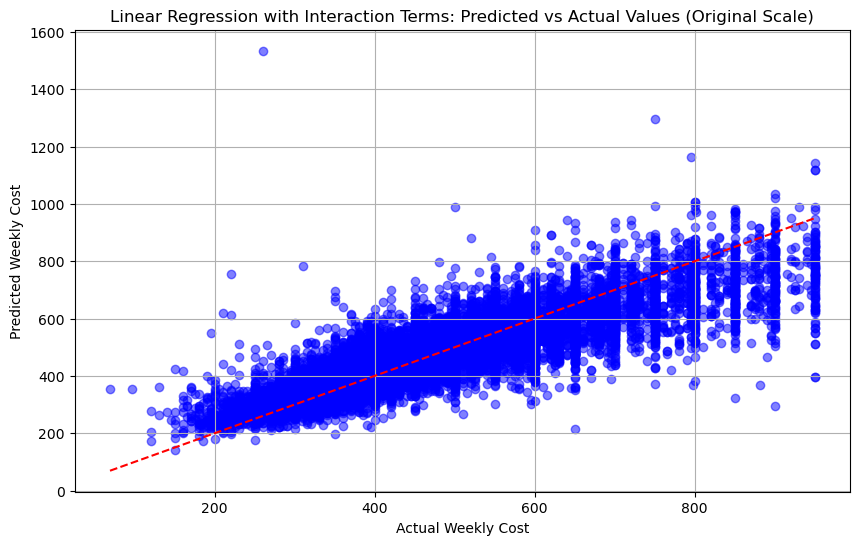

In [ ]:
# PREDICTED VS ACTUAL 

plt.figure(figsize=(10, 6))
plt.scatter(y_test_gm_orig, y_pred_poly_orig, alpha=0.5, color='blue')
plt.plot([min(y_test_gm_orig), max(y_test_gm_orig)], [min(y_test_gm_orig), max(y_test_gm_orig)], color='red', linestyle='--')
plt.title('Linear Regression with Interaction Terms: Predicted vs Actual Values (Original Scale)')
plt.xlabel('Actual Weekly Cost')
plt.ylabel('Predicted Weekly Cost')
plt.grid(True)
plt.show()


In [ ]:
# WITH INTERACTION AND FEATURE SELECTION: 

from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Add interaction terms (degree=2 for interaction terms only)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_gm)
X_test_poly = poly.transform(X_test_gm)

# Step 2: Perform Recursive Feature Elimination (RFE)
lr_model_rfe = LinearRegression()
rfe = RFE(lr_model_rfe, n_features_to_select=15)  # Select 15 most important features
rfe.fit(X_train_poly, y_train_gm)

# Step 3: Selected features
selected_features = poly.get_feature_names_out(X_gm.columns)[rfe.support_]
print("Selected features by RFE (with interaction terms):", selected_features)

# Step 4: Train the model using only the selected features
X_train_selected = rfe.transform(X_train_poly)
X_test_selected = rfe.transform(X_test_poly)
lr_model_rfe.fit(X_train_selected, y_train_gm)

# Step 5: Predictions and evaluation (log-transformed scale)
y_pred_rfe = lr_model_rfe.predict(X_test_selected)
mse_rfe = mean_squared_error(y_test_gm, y_pred_rfe)
print('Linear Regression MSE after RFE (log-transformed scale):', mse_rfe)

# Step 6: Back-transform the predictions and calculate MSE and RMSE on the original scale
y_pred_rfe_orig = np.expm1(y_pred_rfe)
mse_rfe_original = mean_squared_error(y_test_gm_orig, y_pred_rfe_orig)
rmse_rfe_original = np.sqrt(mse_rfe_original)

# Step 7: Output MSE and RMSE on original scale
print('Linear Regression MSE after RFE (original scale):', mse_rfe_original)
print('Linear Regression RMSE after RFE (original scale):', rmse_rfe_original)

# Step 8: Print coefficients for the selected features
importance_rfe = lr_model_rfe.coef_

print("\nFeature Importance (Coefficients) for Selected Features after RFE:")
for feature, importance in zip(selected_features, importance_rfe):
    print(f'Feature: {feature}, Coefficient: {importance:.4f}')


Selected features by RFE (with interaction terms): ['beds housing_index' 'beds cpi_without_housing' 'baths housing_index'
 'dist_to_city housing_index' 'dist_to_city cpi_without_housing'
 'dist_to_parks_and_gardens housing_index'
 'dist_to_parks_and_gardens cpi_without_housing'
 'num_homeless_persons housing_index'
 'num_homeless_persons cpi_without_housing'
 'avg_household_size housing_index'
 'avg_household_size cpi_without_housing' 'num_businesses housing_index'
 'num_businesses cpi_without_housing' 'median_income housing_index'
 'median_income cpi_without_housing']
Linear Regression MSE after RFE (log-transformed scale): 0.10013144422977734
Linear Regression MSE after RFE (original scale): 24627.414925019813
Linear Regression RMSE after RFE (original scale): 156.93124266703495

Feature Importance (Coefficients) for Selected Features after RFE:
Feature: beds housing_index, Coefficient: -454790862300.2606
Feature: beds cpi_without_housing, Coefficient: 454790862300.2542
Feature: bath

Random Forest MSE (log-transformed scale): 0.014584729597113112
Random Forest MSE (original scale): 3835.8387928802003
Random Forest RMSE (original scale): 61.93414884278463


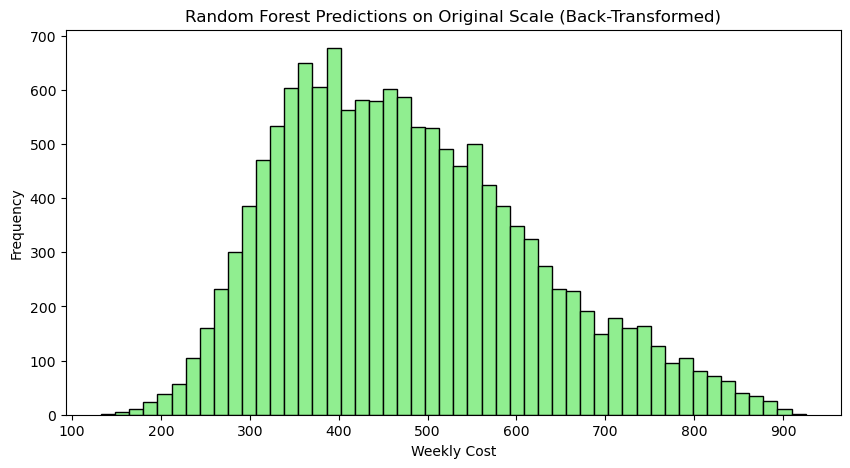


Feature Importances (Random Forest):
Feature: beds, Importance: 0.0992
Feature: baths, Importance: 0.1529
Feature: parking, Importance: 0.0117
Feature: dist_to_city, Importance: 0.0594
Feature: dist_to_education, Importance: 0.0265
Feature: dist_to_parks_and_gardens, Importance: 0.0264
Feature: dist_to_train_station, Importance: 0.0284
Feature: dist_to_healthcare, Importance: 0.0265
Feature: num_homeless_persons, Importance: 0.0094
Feature: avg_household_size, Importance: 0.0455
Feature: num_businesses, Importance: 0.0144
Feature: median_income, Importance: 0.0125
Feature: median_age, Importance: 0.0161
Feature: median_weekly_rent, Importance: 0.3433
Feature: percent_aboriginal_torres_strait_islander, Importance: 0.0125
Feature: percent_au_citizen, Importance: 0.0119
Feature: percent_overseas_born, Importance: 0.0102
Feature: percent_rental_properties, Importance: 0.0133
Feature: population, Importance: 0.0209
Feature: percent_unemployed, Importance: 0.0136
Feature: housing_index, Imp

In [ ]:
# RANDOM  FOREST: 

# Step 1: Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune n_estimators
rf_model.fit(X_train_gm, y_train_gm)

# Step 2: Make predictions on the test set (log-transformed)
y_pred_rf_gm = rf_model.predict(X_test_gm)

# Step 3: Evaluate the model on the log-transformed data (MSE in log scale)
mse_rf_log = mean_squared_error(y_test_gm, y_pred_rf_gm)
print('Random Forest MSE (log-transformed scale):', mse_rf_log)

# Step 4: Back-transform the predictions and true values to the original scale
y_pred_rf_gm_orig = np.expm1(y_pred_rf_gm)  # Convert predictions back to the original scale
y_test_gm_orig = np.expm1(y_test_gm)        # Convert true values back to the original scale

# Step 5: Calculate MSE and RMSE on the original scale
mse_rf_original = mean_squared_error(y_test_gm_orig, y_pred_rf_gm_orig)
rmse_rf_original = np.sqrt(mse_rf_original)
print('Random Forest MSE (original scale):', mse_rf_original)
print('Random Forest RMSE (original scale):', rmse_rf_original)

# Step 6: Plot distribution of predictions on original scale (back-transformed)
plt.figure(figsize=(10,5))
plt.hist(y_pred_rf_gm_orig, bins=50, color='lightgreen', edgecolor='black')
plt.title('Random Forest Predictions on Original Scale (Back-Transformed)')
plt.xlabel('Weekly Cost')
plt.ylabel('Frequency')
plt.show()

# Step 7: Feature Importances
importance_rf = rf_model.feature_importances_
feature_names = X_gm.columns

print("\nFeature Importances (Random Forest):")
for feature, importance in zip(feature_names, importance_rf):
    print(f'Feature: {feature}, Importance: {importance:.4f}')


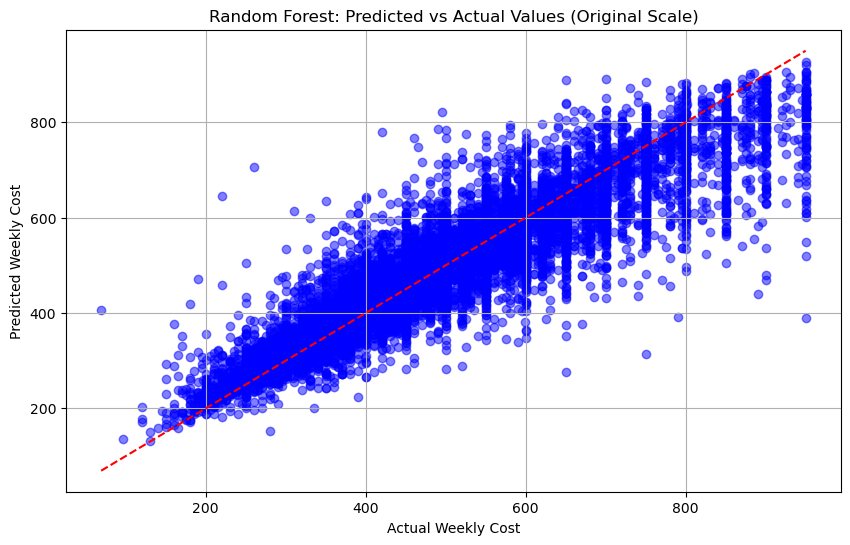

In [ ]:
# PLOTTING PREDICTED VS ACTUAL 

plt.figure(figsize=(10, 6))
plt.scatter(y_test_gm_orig, y_pred_rf_gm_orig, alpha=0.5, color='blue')
plt.plot([min(y_test_gm_orig), max(y_test_gm_orig)], [min(y_test_gm_orig), max(y_test_gm_orig)], color='red', linestyle='--')
plt.title('Random Forest: Predicted vs Actual Values (Original Scale)')
plt.xlabel('Actual Weekly Cost')
plt.ylabel('Predicted Weekly Cost')
plt.grid(True)
plt.show()


### REST OF VIC MODELS

In [ ]:
rest_of_vic.head()

,beds,baths,parking,dist_to_city,dist_to_education,dist_to_parks_and_gardens,dist_to_train_station,dist_to_healthcare,weekly_cost,num_homeless_persons,...,median_age,median_weekly_rent,percent_aboriginal_torres_strait_islander,percent_au_citizen,percent_overseas_born,percent_rental_properties,population,percent_unemployed,housing_index,cpi_without_housing
0,4.0,2.0,2.0,91.83735,2.87569,3.17059,2.96902,4.72762,520.0,47.800000,...,45.16,273.000000,2.400000,15.400000,13.34,27.166667,14208.250639,4.633333,145.288421,127.830132
1,4.0,2.0,2.0,91.83735,2.87569,3.17059,2.96902,4.72762,570.0,47.800000,...,45.16,273.000000,2.400000,15.400000,13.34,27.166667,14208.250639,4.633333,145.288421,127.830132
2,4.0,1.0,2.0,73.33843,6.35949,11.11772,14.49050,14.74958,400.0,54.314085,...,52.08,229.666667,1.860000,10.470000,8.06,8.983333,13106.132992,2.280000,141.520263,125.573860
3,4.0,1.0,2.0,73.33843,6.35949,11.11772,14.49050,14.74958,400.0,51.902817,...,51.04,217.666667,1.700000,9.450000,7.90,8.883333,12696.762148,2.600000,133.983947,121.061316
4,2.0,1.0,3.0,22.60075,0.78947,0.44253,20.22319,18.39855,380.0,15.333333,...,37.64,418.133333,1.533333,4.326667,9.68,10.800000,14208.250639,2.373333,145.288421,127.830132


In [ ]:
# REMOVING TOP 5% SO WE ARE ONLY IN THE 95% RANGE
rest_of_vic = rest_of_vic.dropna()

threshold = rest_of_vic['weekly_cost'].quantile(0.95)
# Step 2: Filter the DataFrame to keep only the data less than or equal to the threshold
rest_of_vic = rest_of_vic[rest_of_vic['weekly_cost'] <= threshold]

Linear Regression MSE (log-transformed scale): 0.04133148615237358
Linear Regression MSE (original scale): 4154.066948832017
Linear Regression RMSE (original scale): 64.45205154866692


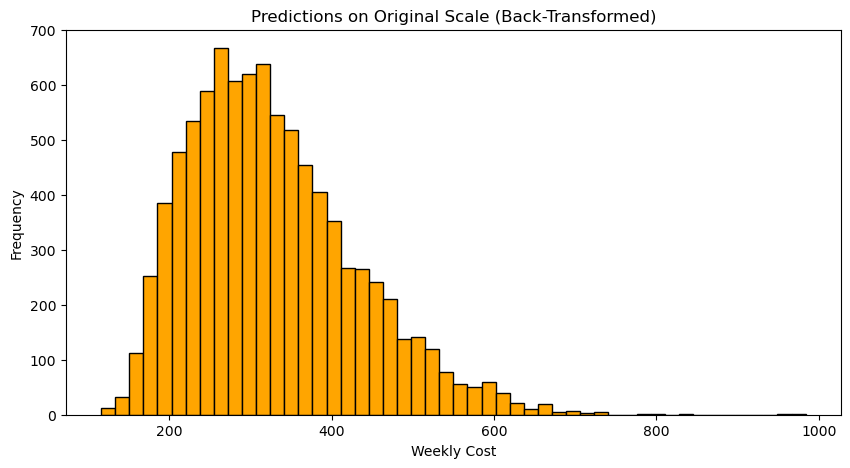


Feature Importances (Coefficients):
Feature: beds, Coefficient: 0.1263
Feature: baths, Coefficient: 0.0548
Feature: parking, Coefficient: 0.0300
Feature: dist_to_city, Coefficient: -0.0407
Feature: dist_to_education, Coefficient: 0.0121
Feature: dist_to_parks_and_gardens, Coefficient: -0.0036
Feature: dist_to_train_station, Coefficient: -0.0114
Feature: dist_to_healthcare, Coefficient: 0.0072
Feature: num_homeless_persons, Coefficient: 0.0132
Feature: avg_household_size, Coefficient: -0.0204
Feature: num_businesses, Coefficient: 0.0084
Feature: median_income, Coefficient: 0.0109
Feature: median_age, Coefficient: 0.0176
Feature: median_weekly_rent, Coefficient: 0.1353
Feature: percent_aboriginal_torres_strait_islander, Coefficient: 0.0046
Feature: percent_au_citizen, Coefficient: 0.0220
Feature: percent_overseas_born, Coefficient: 0.0119
Feature: percent_rental_properties, Coefficient: -0.0056
Feature: population, Coefficient: 0.0087
Feature: percent_unemployed, Coefficient: -0.0181
Fe

In [ ]:
# REGULAR  LINEAR REGRESSION: 

# Step 1: Drop NaN values
rest_of_vic = rest_of_vic.dropna()

# Step 2: Separate features (X) and target variable (y) with log transformation
X_rov = rest_of_vic.drop(columns=['weekly_cost'])
y_rov_log = np.log1p(rest_of_vic['weekly_cost'])  # log1p for better handling of small values

# Step 3: Scale the features
scaler = StandardScaler()
X_rov_scaled = scaler.fit_transform(X_rov)

# Step 4: Split the dataset into training and testing sets
X_train_rov, X_test_rov, y_train_rov, y_test_rov = train_test_split(X_rov_scaled, y_rov_log, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression model
lr_model_rov = LinearRegression()
lr_model_rov.fit(X_train_rov, y_train_rov)

# Step 6: Make predictions on the test set (log-transformed)
y_pred_lr_rov = lr_model_rov.predict(X_test_rov)

# Step 7: Evaluate the model on the log-transformed data (MSE in log scale)
mse_log_rov = mean_squared_error(y_test_rov, y_pred_lr_rov)
print('Linear Regression MSE (log-transformed scale):', mse_log_rov)

# Step 8: Back-transform the predictions and true values to the original scale
y_pred_lr_rov_orig = np.expm1(y_pred_lr_rov)  # Convert predictions back to the original scale
y_test_rov_orig = np.expm1(y_test_rov)        # Convert true values back to the original scale

# Step 9: Calculate MSE and RMSE on the original scale
mse_original_rov = mean_squared_error(y_test_rov_orig, y_pred_lr_rov_orig)
rmse_original_rov = np.sqrt(mse_original_rov)
print('Linear Regression MSE (original scale):', mse_original_rov)
print('Linear Regression RMSE (original scale):', rmse_original_rov)

# Step 11: Plot distribution of predictions on original scale (back-transformed)
plt.figure(figsize=(10,5))
plt.hist(y_pred_lr_rov_orig, bins=50, color='orange', edgecolor='black')
plt.title('Predictions on Original Scale (Back-Transformed)')
plt.xlabel('Weekly Cost')
plt.ylabel('Frequency')
plt.show()

# Step 12: Coefficients with feature names
importance_lr_rov = lr_model_rov.coef_
feature_names = X_rov.columns

print("\nFeature Importances (Coefficients):")
for feature, importance in zip(feature_names, importance_lr_rov):
    print(f'Feature: {feature}, Coefficient: {importance:.4f}')


Random Forest MSE (log-transformed scale): 0.017626379691120072
Random Forest MSE (original scale): 1739.1989178296676
Random Forest RMSE (original scale): 41.70370388622175


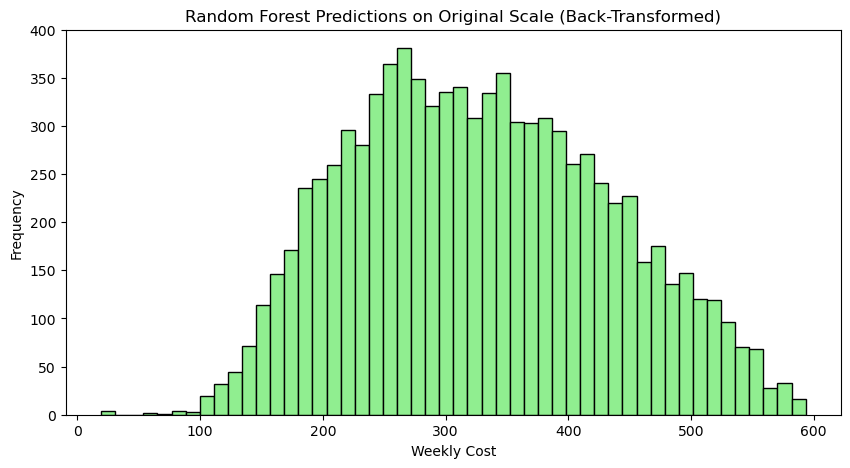


Feature Importances (Random Forest):
Feature: beds, Importance: 0.1527
Feature: baths, Importance: 0.0852
Feature: parking, Importance: 0.0117
Feature: dist_to_city, Importance: 0.0366
Feature: dist_to_education, Importance: 0.0261
Feature: dist_to_parks_and_gardens, Importance: 0.0248
Feature: dist_to_train_station, Importance: 0.0240
Feature: dist_to_healthcare, Importance: 0.0227
Feature: num_homeless_persons, Importance: 0.0087
Feature: avg_household_size, Importance: 0.0082
Feature: num_businesses, Importance: 0.0107
Feature: median_income, Importance: 0.0122
Feature: median_age, Importance: 0.0108
Feature: median_weekly_rent, Importance: 0.4201
Feature: percent_aboriginal_torres_strait_islander, Importance: 0.0095
Feature: percent_au_citizen, Importance: 0.0107
Feature: percent_overseas_born, Importance: 0.0099
Feature: percent_rental_properties, Importance: 0.0091
Feature: population, Importance: 0.0041
Feature: percent_unemployed, Importance: 0.0117
Feature: housing_index, Imp

In [ ]:
# RANDOM  FOREST: 

# Step 1: Train the Random Forest Regressor model
rf_model_rov = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune n_estimators
rf_model_rov.fit(X_train_rov, y_train_rov)

# Step 2: Make predictions on the test set (log-transformed)
y_pred_rf_rov = rf_model_rov.predict(X_test_rov)

# Step 3: Evaluate the model on the log-transformed data (MSE in log scale)
mse_rf_log_rov = mean_squared_error(y_test_rov, y_pred_rf_rov)
print('Random Forest MSE (log-transformed scale):', mse_rf_log_rov)

# Step 4: Back-transform the predictions and true values to the original scale
y_pred_rf_rov_orig = np.expm1(y_pred_rf_rov)  # Convert predictions back to the original scale
y_test_rov_orig = np.expm1(y_test_rov)        # Convert true values back to the original scale

# Step 5: Calculate MSE and RMSE on the original scale
mse_rf_original_rov = mean_squared_error(y_test_rov_orig, y_pred_rf_rov_orig)
rmse_rf_original_rov = np.sqrt(mse_rf_original_rov)
print('Random Forest MSE (original scale):', mse_rf_original_rov)
print('Random Forest RMSE (original scale):', rmse_rf_original_rov)

# Step 6: Plot distribution of predictions on original scale (back-transformed)
plt.figure(figsize=(10,5))
plt.hist(y_pred_rf_rov_orig, bins=50, color='lightgreen', edgecolor='black')
plt.title('Random Forest Predictions on Original Scale (Back-Transformed)')
plt.xlabel('Weekly Cost')
plt.ylabel('Frequency')
plt.show()

# Step 7: Feature Importances
importance_rf_rov = rf_model_rov.feature_importances_
feature_names = X_rov.columns

print("\nFeature Importances (Random Forest):")
for feature, importance in zip(feature_names, importance_rf_rov):
    print(f'Feature: {feature}, Importance: {importance:.4f}')


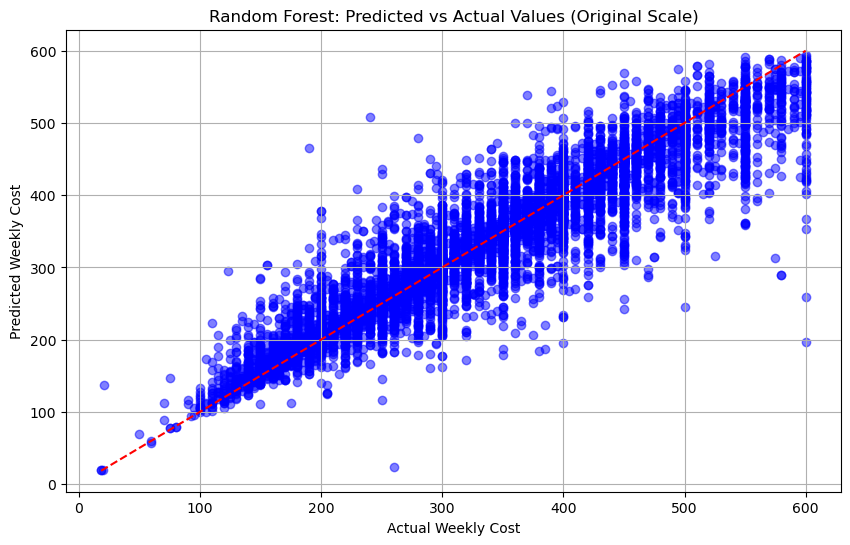

In [ ]:
# PLOTTING  PREDICTED VS ACTUAL 

plt.figure(figsize=(10, 6))
plt.scatter(y_test_rov_orig, y_pred_rf_rov_orig, alpha=0.5, color='blue')
plt.plot([min(y_test_rov_orig), max(y_test_rov_orig)], [min(y_test_rov_orig), max(y_test_rov_orig)], color='red', linestyle='--')
plt.title('Random Forest: Predicted vs Actual Values (Original Scale)')
plt.xlabel('Actual Weekly Cost')
plt.ylabel('Predicted Weekly Cost')
plt.grid(True)
plt.show()


## Livability and Affordability

In [ ]:
# IMPORTS 
import pandas as pd
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import time
from openrouteservice import Client
import sys
sys.path.append("../")
import overpy
from shapely.geometry import Point
from scripts.liveability_calc import fetch_amenities, map_amenities_to_sa2, merge_ammentity



FIRST LET FIND THE NUMBER OF BUSINESSES

In [ ]:
# Read the CSV file into a DataFrame
businesses = pd.read_csv('../data/curated/extrapolated_business.csv')

# Keep only the 'SA2_name_2021' and '2024' columns and explicitly create a copy
base_df = businesses[['SA2_name_2021', '2024']].copy()

# Rename the '2024' column to 'num_businesses'
base_df.rename(columns={'2024': 'num_businesses'}, inplace=True)

# Display the first 10 rows of the DataFrame
base_df.head(10)

,SA2_name_2021,num_businesses
0,Abbotsford,1783.700000
1,Airport West,1032.100000
2,Albert Park,5590.500000
3,Alexandra,889.000000
4,Alfredton,1323.900000
5,Alphington - Fairfield,1201.100000
6,Alps - East,1462.636609
7,Alps - West,12.000000
8,Altona,1314.600000
9,Altona Meadows,1082.200000


NOW LETS FIND THE NUMBER OF HOMELESS PEOPLE PER SA2

In [ ]:
homelessness = pd.read_csv('../data/curated/extrapolated_homelessness_data.csv')
homelessness_df = homelessness[['SA2_name_2021', '2024']].copy()

# Merge the base_df with the homelessness data on 'SA2_name_2021'
base_df = pd.merge(base_df, homelessness_df, on='SA2_name_2021', how='left')

# Rename the '2024' column from the homelessness data to 'homelessness'
base_df.rename(columns={'2024': 'homelessness'}, inplace=True)
base_df['homelessness'] = base_df['homelessness'].fillna(base_df['homelessness'].median())
# Display the first 10 rows of the merged DataFrame
base_df.head(10) # there are about 150 rows which are NA

,SA2_name_2021,num_businesses,homelessness
0,Abbotsford,1783.700000,106.466667
1,Airport West,1032.100000,6.533333
2,Albert Park,5590.500000,34.666667
3,Alexandra,889.000000,29.866667
4,Alfredton,1323.900000,33.733333
5,Alphington - Fairfield,1201.100000,35.666667
6,Alps - East,1462.636609,0.000000
7,Alps - West,12.000000,0.000000
8,Altona,1314.600000,36.466667
9,Altona Meadows,1082.200000,60.533333


NOW LETS FIND THE AMOUNT OF CRIME

WE CAN ACCQUIRE THE CRIME BY SUBURB BUT NOT SA2 SO LETS USE SHAPE FILES TO FIGURE OUT THE CRIME PER SA2

In [ ]:
import requests
import zipfile
import io

# URL of the ZIP file
url = 'https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/SAL_2021_AUST_GDA2020_SHP.zip'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open the ZIP file from the response content
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Extract all the contents into a specified directory
        z.extractall('../data/landing/SAL_2021_AUST_GDA2020_SHP')
    print("ZIP file downloaded and extracted successfully!")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

ZIP file downloaded and extracted successfully!


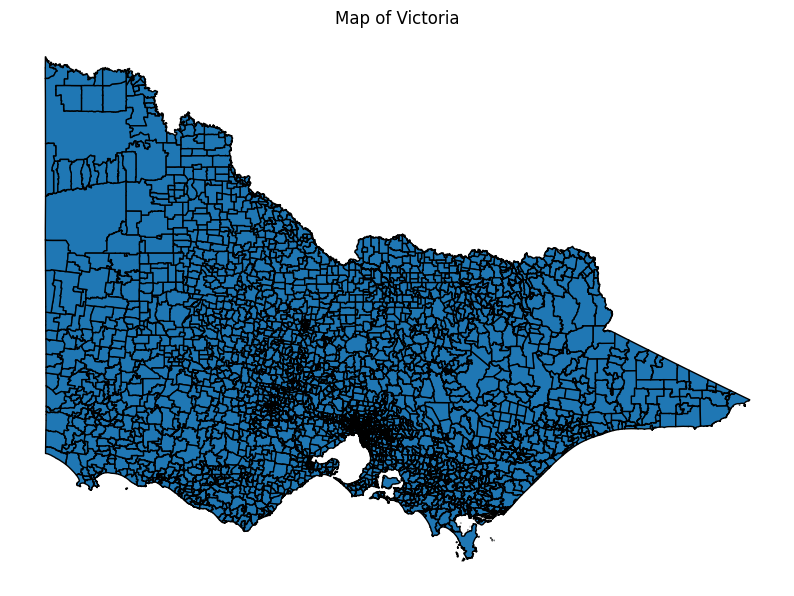

In [ ]:
# SUBURBS SHAPE FILE:
gdf = gpd.read_file("../data/landing/SAL_2021_AUST_GDA2020_SHP/SAL_2021_AUST_GDA2020.shp")

victoria_gdf = gdf[gdf['STE_NAME21'] == 'Victoria']

# Display the first few rows of the filtered GeoDataFrame
victoria_gdf.head()

# Plot the filtered GeoDataFrame
victoria_gdf.plot(figsize=(10, 10), edgecolor='black')

# Set title and show the plot
plt.title('Map of Victoria')
plt.axis('off')  # Turn off the axis
plt.show()

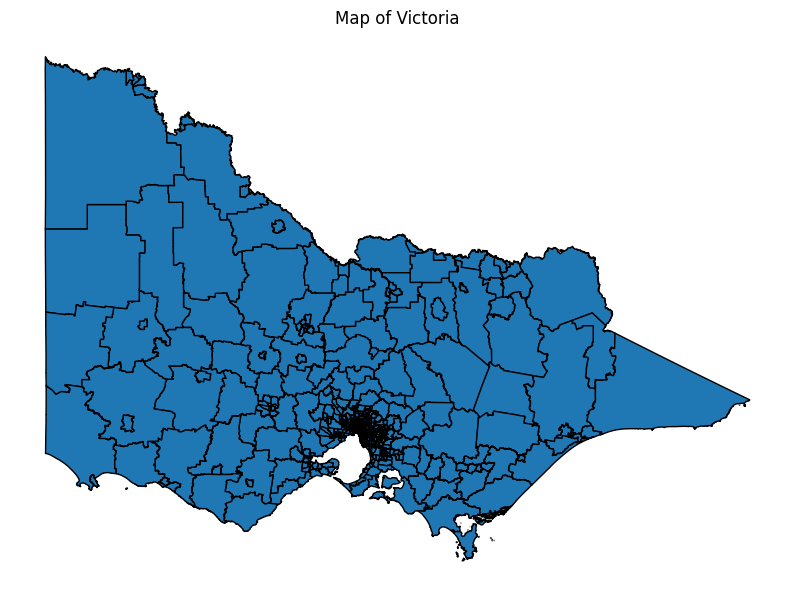

In [ ]:
# SA2 REGION SHAPEFILE

gdf_sa = gpd.read_file("../data/SA2/SA2_extracted/SA2_2021_AUST_GDA2020.shp")

victoria_gdf_sa = gdf_sa[gdf_sa['STE_NAME21'] == 'Victoria']

# Display the first few rows of the filtered GeoDataFrame
victoria_gdf_sa.head()

# Plot the filtered GeoDataFrame
victoria_gdf_sa.plot(figsize=(10, 10), edgecolor='black')

# Set title and show the plot
plt.title('Map of Victoria')
plt.axis('off')  # Turn off the axis
plt.show()

NOW WE MERGE THE SA2 REGION AND SUBURB DATASET

In [ ]:
# Ensure both GeoDataFrames are in the same coordinate reference system (CRS)
victoria_gdf = victoria_gdf.to_crs(victoria_gdf_sa.crs)

# Perform a spatial join to find suburbs that intersect with SA2 regions
joined_gdf = gpd.sjoin(victoria_gdf, victoria_gdf_sa, how='inner', predicate='intersects')

# Calculate the area of overlap for each suburb-SA2 pair
joined_gdf['overlap_area'] = joined_gdf.geometry.area

# Group by suburb and find the SA2 region with the largest overlap area
dominant_sa2 = joined_gdf.loc[joined_gdf.groupby('SAL_NAME21')['overlap_area'].idxmax()]

# Remove '(Vic.)' from the SAL_NAME21 column
dominant_sa2['SAL_NAME21'] = dominant_sa2['SAL_NAME21'].str.replace(r'\s*\(Vic\.\)', '', regex=True)

# Select relevant columns for the grouped DataFrame
grouped_df = dominant_sa2[['SA2_NAME21', 'SAL_NAME21']]

# Group by SA2 region and aggregate the suburbs into a list
grouped_df = grouped_df.groupby('SA2_NAME21').agg({'SAL_NAME21': list}).reset_index()

# Rename columns for clarity
grouped_df.columns = ['SA2_Region', 'Suburbs']

# Display the resulting DataFrame
print("SA2 Regions with Suburbs:")



SA2 Regions with Suburbs:


/var/folders/yg/_fjjq8pn4sddkcj7f3bzk7kr0000gn/T/ipykernel_85438/4072660537.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  joined_gdf['overlap_area'] = joined_gdf.geometry.area


In [ ]:
grouped_df.head(30)

,SA2_Region,Suburbs
0,Abbotsford,"[Abbotsford, Clifton Hill, Collingwood, Fairfi..."
1,Airport West,"[Airport West, Essendon Fields, Keilor East, K..."
2,Albert Park,"[Albert Park, Melbourne, Middle Park, Port Mel..."
3,Alexandra,"[Acheron, Alexandra, Bonnie Doon, Buxton, Camb..."
4,Alfredton,"[Alfredton, Bo Peep, Bunkers Hill, Cardigan, C..."
5,Alphington - Fairfield,"[Alphington, Fairfield, Ivanhoe, Northcote, Th..."
6,Alps - East,"[Benambra, Bindi, Brumby, Buchan, Butchers Rid..."
7,Alps - West,"[Arbuckle, Billabong, Briagolong, Budgee Budge..."
8,Altona,"[Altona, Altona Meadows, Altona North, Laverto..."
9,Altona Meadows,"[Altona, Altona Meadows, Laverton, Point Cook,..."


NOW WE FINALLY DOWNLOAD THE CRIME DATA

In [ ]:
# URL of the Excel file
url = "https://files.crimestatistics.vic.gov.au/2024-09/Data_Tables_LGA_Recorded_Offences_Year_Ending_June_2024.xlsx"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Write the content to a file
    with open("../data/landing/recorded_offences_data.xlsx", 'wb') as file:
        file.write(response.content)
    print("File downloaded and saved")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded and saved


In [ ]:
# Read the entire Excel file to find the names of the sheets
xls = pd.ExcelFile("../data/landing/recorded_offences_data.xlsx")

# Display the names of the sheets
print("Available sheets:", xls.sheet_names)

# Load Table 3 (replace 'Sheet3' with the actual sheet name if necessary)
# You can find the sheet name from the output above
table3_df = pd.read_excel(xls, sheet_name='Table 03')  # Use the correct sheet name for Table 3

# Display the first few rows of Table 3
print("Table 3 Data:")
table3_df.head()

Available sheets: ['Contents', 'Footnotes', 'Table 01', 'Table 02', 'Table 03', 'Table 04', 'Table 05', 'Table 06']
Table 3 Data:


,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
0,2024,June,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B42 Steal from a motor vehicle,1
1,2024,June,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B49 Other theft,1
2,2024,June,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,3
3,2024,June,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D13 Explosives offences,1
4,2024,June,Alpine,3691,Mongans Bridge,B Property and deception offences,B40 Theft,B49 Other theft,1


In [ ]:
crime_data = table3_df[table3_df['Year'] == 2024].groupby('Suburb/Town Name')['Offence Count'].sum().reset_index()

# Rename columns for clarity
crime_data.columns = ['Suburb/Town Name', 'Total Offence Count']

# Display the grouped DataFrame
print("Grouped Data for Year 2024:")
crime_data.head()

Grouped Data for Year 2024:


,Suburb/Town Name,Total Offence Count
0,Abbotsford,1350
1,Aberfeldie,139
2,Aberfeldy,1
3,Acheron,1
4,Ada,1


CALC CRIME PER SA2

In [ ]:
exploded_sa2_df = grouped_df.explode('Suburbs')

# Merge the exploded SA2 DataFrame with the crime data
merged_df = pd.merge(exploded_sa2_df, crime_data, left_on='Suburbs', right_on='Suburb/Town Name', how='outer')

# Rename columns for clarity
merged_df.rename(columns={'Offence Count': 'Total Offences'}, inplace=True)

# Display the resulting DataFrame
print("Merged DataFrame with SA2 Regions and Offences:")
merged_df.head(30)

Merged DataFrame with SA2 Regions and Offences:


,SA2_Region,Suburbs,Suburb/Town Name,Total Offence Count
0,Bright - Mount Beauty,Abbeyard,NaN,NaN
1,Wangaratta Surrounds,Abbeyard,NaN,NaN
2,Abbotsford,Abbotsford,Abbotsford,1350.0
3,Clifton Hill - Alphington,Abbotsford,Abbotsford,1350.0
4,Collingwood,Abbotsford,Abbotsford,1350.0
5,Hawthorn - North,Abbotsford,Abbotsford,1350.0
6,Kew - West,Abbotsford,Abbotsford,1350.0
7,Richmond - North,Abbotsford,Abbotsford,1350.0
8,Essendon (West) - Aberfeldie,Aberfeldie,Aberfeldie,139.0
9,Essendon - East,Aberfeldie,Aberfeldie,139.0


In [ ]:
# Group by 'SA2_Region' and sum the 'Total Offence Count'
collapsed_df = merged_df.groupby('SA2_Region', as_index=False).agg({'Total Offence Count': 'sum'})

# Display the resulting DataFrame
print("Collapsed DataFrame with unique SA2 Regions and Total Offence Count:")
collapsed_df.head()

Collapsed DataFrame with unique SA2 Regions and Total Offence Count:


,SA2_Region,Total Offence Count
0,Abbotsford,9898.0
1,Airport West,3429.0
2,Albert Park,33245.0
3,Alexandra,552.0
4,Alfredton,4281.0


In [ ]:
# Merge the base_df with the homelessness data on 'SA2_name_2021'
base_df = pd.merge(base_df, collapsed_df, left_on='SA2_name_2021', right_on='SA2_Region', how='left')

# Rename the '2024' column from the homelessness data to 'homelessness'
base_df.rename(columns={'Total Offence Count': 'num_crimes'}, inplace=True)
base_df = base_df.drop('SA2_Region', axis=1)
# Display the first 10 rows of the merged DataFrame
base_df.head(10)

,SA2_name_2021,num_businesses,homelessness,num_crimes
0,Abbotsford,1783.700000,106.466667,9898.0
1,Airport West,1032.100000,6.533333,3429.0
2,Albert Park,5590.500000,34.666667,33245.0
3,Alexandra,889.000000,29.866667,552.0
4,Alfredton,1323.900000,33.733333,4281.0
5,Alphington - Fairfield,1201.100000,35.666667,4805.0
6,Alps - East,1462.636609,0.000000,57.0
7,Alps - West,12.000000,0.000000,97.0
8,Altona,1314.600000,36.466667,5510.0
9,Altona Meadows,1082.200000,60.533333,4944.0


NOW WE ADD POPULATION DATA

In [ ]:
# Read the CSV file into a DataFrame
population = pd.read_csv('../data/curated/extrapolated_population.csv')
population.rename(columns={'Unnamed: 0': 'SA2_name_2021'}, inplace=True)
population = population[['SA2_name_2021', '2024']].copy()

# Merge the base_df with the homelessness data on 'SA2_name_2021'
base_df = pd.merge(base_df, population, on='SA2_name_2021', how='left')

# Rename the '2024' column from the homelessness data to 'homelessness'
base_df.rename(columns={'2024': 'population'}, inplace=True)
base_df['population'].fillna(0, inplace=True)

# Display the first 10 rows of the merged DataFrame
base_df.head(10) # there are about 150 rows which are NA

/var/folders/yg/_fjjq8pn4sddkcj7f3bzk7kr0000gn/T/ipykernel_85438/802509739.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_df['population'].fillna(0, inplace=True)


,SA2_name_2021,num_businesses,homelessness,num_crimes,population
0,Abbotsford,1783.700000,106.466667,9898.0,13929.0
1,Airport West,1032.100000,6.533333,3429.0,8825.0
2,Albert Park,5590.500000,34.666667,33245.0,18449.0
3,Alexandra,889.000000,29.866667,552.0,6850.0
4,Alfredton,1323.900000,33.733333,4281.0,16896.0
5,Alphington - Fairfield,1201.100000,35.666667,4805.0,11421.0
6,Alps - East,1462.636609,0.000000,57.0,3.0
7,Alps - West,12.000000,0.000000,97.0,24.0
8,Altona,1314.600000,36.466667,5510.0,14537.0
9,Altona Meadows,1082.200000,60.533333,4944.0,21558.0


NOW WE ADD THE AREA OF EACH SA2

In [ ]:
# AREASQKM21
copied_victoria_gdf_sa = victoria_gdf_sa[['SA2_NAME21', 'AREASQKM21']].copy()
base_df = pd.merge(base_df, copied_victoria_gdf_sa, left_on='SA2_name_2021', right_on='SA2_NAME21', how='left')
base_df = base_df.drop('SA2_NAME21', axis=1)
base_df.head()

,SA2_name_2021,num_businesses,homelessness,num_crimes,population,AREASQKM21
0,Abbotsford,1783.7,106.466667,9898.0,13929.0,1.7405
1,Airport West,1032.1,6.533333,3429.0,8825.0,3.7194
2,Albert Park,5590.5,34.666667,33245.0,18449.0,4.6747
3,Alexandra,889.0,29.866667,552.0,6850.0,2118.9554
4,Alfredton,1323.9,33.733333,4281.0,16896.0,52.7109


NOW WE CALCULATE THE DENSITY

In [ ]:
base_df['population_density'] = base_df['population'] / base_df['AREASQKM21']

# Display the first 10 rows to check the result
base_df.head(10)

,SA2_name_2021,num_businesses,homelessness,num_crimes,population,AREASQKM21,population_density
0,Abbotsford,1783.700000,106.466667,9898.0,13929.0,1.7405,8002.872738
1,Airport West,1032.100000,6.533333,3429.0,8825.0,3.7194,2372.694521
2,Albert Park,5590.500000,34.666667,33245.0,18449.0,4.6747,3946.563416
3,Alexandra,889.000000,29.866667,552.0,6850.0,2118.9554,3.232725
4,Alfredton,1323.900000,33.733333,4281.0,16896.0,52.7109,320.540913
5,Alphington - Fairfield,1201.100000,35.666667,4805.0,11421.0,2.8853,3958.340554
6,Alps - East,1462.636609,0.000000,57.0,3.0,2071.2834,0.001448
7,Alps - West,12.000000,0.000000,97.0,24.0,2955.6802,0.008120
8,Altona,1314.600000,36.466667,5510.0,14537.0,17.6826,822.107609
9,Altona Meadows,1082.200000,60.533333,4944.0,21558.0,10.5419,2044.982404


NOW WE CAN ADD THE MEDIAN RENT

In [ ]:
median_rent = pd.read_csv('../data/curated/extrapolated_median_rent.csv')
median_rent = median_rent[['SA2_name_2021', '2024']].copy()

# Merge the base_df with the median rent data on 'SA2_name_2021'
base_df = pd.merge(base_df, median_rent, on='SA2_name_2021', how='left')

# Rename the '2024' column from the median rent data to 'median_rent'
base_df.rename(columns={'2024': 'median_rent'}, inplace=True)
# Display the first 10 rows of the merged DataFrame
base_df.head(10)

,SA2_name_2021,num_businesses,homelessness,num_crimes,population,AREASQKM21,population_density,median_rent
0,Abbotsford,1783.700000,106.466667,9898.0,13929.0,1.7405,8002.872738,438.333333
1,Airport West,1032.100000,6.533333,3429.0,8825.0,3.7194,2372.694521,426.800000
2,Albert Park,5590.500000,34.666667,33245.0,18449.0,4.6747,3946.563416,509.800000
3,Alexandra,889.000000,29.866667,552.0,6850.0,2118.9554,3.232725,275.666667
4,Alfredton,1323.900000,33.733333,4281.0,16896.0,52.7109,320.540913,406.333333
5,Alphington - Fairfield,1201.100000,35.666667,4805.0,11421.0,2.8853,3958.340554,408.466667
6,Alps - East,1462.636609,0.000000,57.0,3.0,2071.2834,0.001448,388.932872
7,Alps - West,12.000000,0.000000,97.0,24.0,2955.6802,0.008120,0.000000
8,Altona,1314.600000,36.466667,5510.0,14537.0,17.6826,822.107609,420.933333
9,Altona Meadows,1082.200000,60.533333,4944.0,21558.0,10.5419,2044.982404,360.533333


### NOW WE WANT TO GET DATA ON NUMBER OF AMMENETIES PER SUBURB:

In [ ]:
# Initialize the Overpass API
overpass_api = overpy.Overpass()


In [ ]:
# SA2 Shapefile
sa2_gdf = gpd.read_file("../data/SA2/SA2_extracted/SA2_2021_AUST_GDA2020.shp")

In [ ]:
# Dictionary storing the queries for different amenities (nodes and ways)
queries = {
    "education": ["""
        node["amenity"="kindergarten"](area.searchArea);
        node["amenity"="school"](area.searchArea);
    """, 
    """
        way["amenity"="kindergarten"](area.searchArea);
        way["amenity"="school"](area.searchArea);
    """],
    "parks_and_gardens": ["""
        node["leisure"="park"](area.searchArea);
        node["leisure"="garden"](area.searchArea);
    """,
    """
        way["leisure"="park"](area.searchArea);
        way["leisure"="garden"](area.searchArea);
    """],
    "train_station": ["""
        node["railway"="station"](area.searchArea);
    """, 
    """
        way["railway"="station"](area.searchArea);
    """],
    "shopping": ["""
        node["shop"="supermarket"](area.searchArea);
        node["shop"="mall"](area.searchArea);
    """, 
    """
        way["shop"="supermarket"](area.searchArea);
        way["shop"="mall"](area.searchArea);
    """],
    "healthcare": ["""
        node["amenity"="hospital"](area.searchArea);
        node["amenity"="clinic"](area.searchArea);
    """,
    """
        way["amenity"="hospital"](area.searchArea);
        way["amenity"="clinic"](area.searchArea);
    """]
}



In [ ]:
# Dictionary to store DataFrames for each amenity
amenities_dfs = {}

# Iterate through the queries and fetch data for each
for amenity_type, query in queries.items():
    try:
        df = fetch_amenities(overpass_api, query[0], query[1])
        amenities_dfs[amenity_type] = df
        print(f"Successfully fetched data for {amenity_type}")
    except Exception as e:
        print(f"Error fetching data for {amenity_type}: {e}")


Successfully fetched data for education
Successfully fetched data for parks_and_gardens
Successfully fetched data for train_station
Successfully fetched data for shopping
Successfully fetched data for healthcare


In [ ]:
# Iterates through each amenity and adds SA2 region

for amenity_type, amenity_df in amenities_dfs.items():
    try:
        df = map_amenities_to_sa2(amenity_df, sa2_gdf)
        amenities_dfs[amenity_type] = df
        print(f"Successfully fetched SA2 regions for {amenity_type}")
    except Exception as e:
        print(f"Error fetching SA2 region for {amenity_type}: {e}")


/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/notebooks/../scripts/liveability_calc.py:86: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:7844

  gdf_amenities_with_sa2 = gpd.sjoin(gdf_amenities, sa2_gdf[['SA2_NAME21', 'geometry']], how="left", predicate="within")


Successfully fetched SA2 regions for education
Successfully fetched SA2 regions for parks_and_gardens
Successfully fetched SA2 regions for train_station


/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/notebooks/../scripts/liveability_calc.py:86: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:7844

  gdf_amenities_with_sa2 = gpd.sjoin(gdf_amenities, sa2_gdf[['SA2_NAME21', 'geometry']], how="left", predicate="within")
/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/notebooks/../scripts/liveability_calc.py:86: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:7844

  gdf_amenities_with_sa2 = gpd.sjoin(gdf_amenities, sa2_gdf[['SA2_NAME21', 'geometry']], how="left", predicate="within")
/Users/lauragrant/Documents/GitHub/project-2-group-rea

Successfully fetched SA2 regions for shopping
Successfully fetched SA2 regions for healthcare


/Users/lauragrant/Documents/GitHub/project-2-group-real-estate-industry-project-31/notebooks/../scripts/liveability_calc.py:86: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:7844

  gdf_amenities_with_sa2 = gpd.sjoin(gdf_amenities, sa2_gdf[['SA2_NAME21', 'geometry']], how="left", predicate="within")


In [ ]:
# HERE WE COUNT THE NUMBER OF AMENITIES PER SA2 REGION

amenities_sa2_counts = {}

# Iterate through the amenities DataFrames
for amenity_type, df in amenities_dfs.items():
    # Group by SA2_NAME21 and count the number of occurrences
    sa2_count_df = df.groupby('SA2_NAME21').size().reset_index(name='count')
    
    # Store the result in the new dictionary with a key indicating the amenity
    amenities_sa2_counts[f"{amenity_type}_sa2_count"] = sa2_count_df
    
    # Print the result for each amenity
    print(f"SA2 counts for {amenity_type}:")
    sa2_count_df.head()

SA2 counts for education:
     SA2_NAME21  count
0    Abbotsford      3
1  Airport West      8
2   Albert Park      7
3     Alexandra      8
4     Alfredton      6
SA2 counts for parks_and_gardens:
     SA2_NAME21  count
0    Abbotsford     13
1  Airport West      7
2   Albert Park     15
3     Alexandra     13
4     Alfredton     21
SA2 counts for train_station:
               SA2_NAME21  count
0              Abbotsford      2
1  Alphington - Fairfield      2
2                  Altona      3
3                  Ararat      1
4         Ardeer - Albion      1
SA2 counts for shopping:
     SA2_NAME21  count
0    Abbotsford      8
1  Airport West      5
2   Albert Park      5
3     Alexandra      3
4     Alfredton      3
SA2 counts for healthcare:
               SA2_NAME21  count
0             Albert Park      6
1               Alexandra      3
2               Alfredton      2
3  Alphington - Fairfield      8
4          Altona Meadows      1


In [ ]:
education_count = amenities_sa2_counts['education_sa2_count']
parks_count = amenities_sa2_counts['parks_and_gardens_sa2_count']
healthcare_count = amenities_sa2_counts['healthcare_sa2_count']
shopping_count = amenities_sa2_counts['shopping_sa2_count']
train_count = amenities_sa2_counts['train_station_sa2_count']

### NOW WE MERGE THESE AMMENITIES COUNTS WITH THE BASE LIVEABILITY DF

In [ ]:
base_df = merge_ammentity(base_df, education_count, "education_count")
base_df = merge_ammentity(base_df, parks_count, "parks_count")
base_df = merge_ammentity(base_df, healthcare_count, "healthcare_count")
base_df = merge_ammentity(base_df, shopping_count, "shopping_count")
base_df = merge_ammentity(base_df, train_count, "train_count")

In [ ]:
base_df.head()

,SA2_name_2021,num_businesses,homelessness,num_crimes,population,AREASQKM21,population_density,median_rent,education_count,parks_count,healthcare_count,shopping_count,train_count
0,Abbotsford,1783.7,106.466667,9898.0,13929.0,1.7405,8002.872738,438.333333,3.0,13.0,0.0,8.0,2.0
1,Airport West,1032.1,6.533333,3429.0,8825.0,3.7194,2372.694521,426.800000,8.0,7.0,0.0,5.0,0.0
2,Albert Park,5590.5,34.666667,33245.0,18449.0,4.6747,3946.563416,509.800000,7.0,15.0,6.0,5.0,0.0
3,Alexandra,889.0,29.866667,552.0,6850.0,2118.9554,3.232725,275.666667,8.0,13.0,3.0,3.0,0.0
4,Alfredton,1323.9,33.733333,4281.0,16896.0,52.7109,320.540913,406.333333,6.0,21.0,2.0,3.0,0.0


NOW WE CALCULATE DISTANCE FROM CBD FOR  EACH SA2 REGION:

In [ ]:
# Ensure your GeoDataFrame is in the correct CRS (EPSG:7856)
victoria_gdf_sa = victoria_gdf_sa.to_crs(epsg=7856)

# Define the Melbourne CBD coordinates
melbourne_cbd_coords = (-37.810272, 144.962646)

# Create a Point geometry for Melbourne CBD
melbourne_cbd = gpd.GeoSeries(gpd.points_from_xy([melbourne_cbd_coords[1]], [melbourne_cbd_coords[0]]), crs="EPSG:4326").to_crs(epsg=7856)

# Calculate the centroids of each SA2 region
victoria_gdf_sa['centroid'] = victoria_gdf_sa.geometry.centroid

# Calculate the distance from each centroid to Melbourne CBD
victoria_gdf_sa['distance_to_cbd'] = victoria_gdf_sa['centroid'].distance(melbourne_cbd.iloc[0])

# Convert distance to kilometers (assuming the original units are meters)
victoria_gdf_sa['distance_to_cbd_km'] = victoria_gdf_sa['distance_to_cbd'] / 1000

# Create a new DataFrame with SA2 names and their distances to Melbourne CBD
distance_df = victoria_gdf_sa[['SA2_NAME21', 'distance_to_cbd_km']]

# Display the first few rows of the distance DataFrame
distance_df.head()

,SA2_NAME21,distance_to_cbd_km
644,Alfredton,111.862336
645,Ballarat,103.942664
646,Buninyong,97.794015
647,Delacombe,108.186005
648,Smythes Creek,110.049934


In [ ]:
base_df = pd.merge(base_df, distance_df, left_on='SA2_name_2021', right_on='SA2_NAME21', how='left')
base_df = base_df.drop('SA2_NAME21', axis=1)
base_df.head(10)

,SA2_name_2021,num_businesses,homelessness,num_crimes,population,AREASQKM21,population_density,median_rent,education_count,parks_count,healthcare_count,shopping_count,train_count,distance_to_cbd_km
0,Abbotsford,1783.700000,106.466667,9898.0,13929.0,1.7405,8002.872738,438.333333,3.0,13.0,0.0,8.0,2.0,3.348513
1,Airport West,1032.100000,6.533333,3429.0,8825.0,3.7194,2372.694521,426.800000,8.0,7.0,0.0,5.0,0.0,12.047676
2,Albert Park,5590.500000,34.666667,33245.0,18449.0,4.6747,3946.563416,509.800000,7.0,15.0,6.0,5.0,0.0,3.948455
3,Alexandra,889.000000,29.866667,552.0,6850.0,2118.9554,3.232725,275.666667,8.0,13.0,3.0,3.0,0.0,92.012568
4,Alfredton,1323.900000,33.733333,4281.0,16896.0,52.7109,320.540913,406.333333,6.0,21.0,2.0,3.0,0.0,111.862336
5,Alphington - Fairfield,1201.100000,35.666667,4805.0,11421.0,2.8853,3958.340554,408.466667,3.0,5.0,8.0,3.0,2.0,6.796197
6,Alps - East,1462.636609,0.000000,57.0,3.0,2071.2834,0.001448,388.932872,0.0,0.0,0.0,0.0,0.0,287.854550
7,Alps - West,12.000000,0.000000,97.0,24.0,2955.6802,0.008120,0.000000,0.0,0.0,0.0,0.0,0.0,171.945739
8,Altona,1314.600000,36.466667,5510.0,14537.0,17.6826,822.107609,420.933333,7.0,18.0,0.0,3.0,3.0,14.215328
9,Altona Meadows,1082.200000,60.533333,4944.0,21558.0,10.5419,2044.982404,360.533333,4.0,27.0,1.0,3.0,0.0,17.642499


NOW WE HAVE ACCUMULATAED ALL THIS DATA, WE CAN BEGIN TO USE IT TO MODEL LIVEABILITY

FIRST WE MIN MAX SCALE

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to normalize (excluding 'SA2_name_2021')
columns_to_normalize = [
    'num_businesses', 'homelessness', 'num_crimes', 'population', 
    'AREASQKM21', 'population_density', 'median_rent', 
    'education_count', 'parks_count', 'healthcare_count', 
    'shopping_count', 'train_count', 'distance_to_cbd_km'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
base_df[columns_to_normalize] = scaler.fit_transform(base_df[columns_to_normalize])

# Reverse the scaled values (for undesirable features)
base_df[['num_crimes', 'homelessness', 'median_rent', 'distance_to_cbd_km']] = 1 - base_df[['num_crimes', 'homelessness', 'median_rent', 'distance_to_cbd_km']]

base_df.head()

,SA2_name_2021,num_businesses,homelessness,num_crimes,population,AREASQKM21,population_density,median_rent,education_count,parks_count,healthcare_count,shopping_count,train_count,distance_to_cbd_km,ranking_score,rank
0,Abbotsford,0.115548,0.754873,0.726340,0.409966,0.999945,0.530269,0.519160,0.176471,0.134021,0.000000,0.285714,0.4,0.993508,2.662064,86.0
1,Airport West,0.066799,0.984958,0.905195,0.259742,0.999854,0.157214,0.531812,0.470588,0.072165,0.000000,0.178571,0.0,0.975586,1.808081,334.0
2,Albert Park,0.362458,0.920184,0.080843,0.543001,0.999809,0.261499,0.440763,0.411765,0.154639,0.230769,0.178571,0.0,0.992272,3.356270,21.0
3,Alexandra,0.057518,0.931236,0.984738,0.201613,0.901782,0.000214,0.697601,0.470588,0.134021,0.115385,0.107143,0.0,0.810843,1.795635,341.0
4,Alfredton,0.085726,0.922333,0.881639,0.497292,0.997582,0.021239,0.554264,0.352941,0.216495,0.076923,0.107143,0.0,0.769948,2.110103,235.0


NOW WE CAN WEIGHT EACH FEATURE 

In [ ]:
# Define weights for each feature (equal weights in this example)
weights = {
    'num_businesses': 1,  # Moderate positive weight, as access to businesses like shops, offices, etc. is important for convenience and jobs.
    'homelessness': 2,  # Negative weight, as higher homelessness might indicate socio-economic challenges, which can impact livability.
    'num_crimes': 2,  # Strong negative weight, as higher crime rates directly affect safety and livability.
    'population': 0.3,  # Slight positive weight, as moderate population size can imply vibrancy, but too large may affect congestion.
    'AREASQKM21': 0,  # Slight negative weight, as larger areas might mean fewer amenities are close by, making the area less convenient.
    'population_density': 0.6,  # Moderate positive weight, as higher density often means better access to services, but too high can result in overcrowding.
    'median_rent': 0.8,  # Strong negative weight, as affordability is key to liveability, and lower rents make an area more accessible to residents.
    'education_count': 1,  # High positive weight, as good access to education improves community quality and is a major factor for families.
    'parks_count': 0.9,  # High positive weight, as green spaces are crucial for recreation, health, and quality of life.
    'healthcare_count': 2,  # High positive weight, as access to healthcare is essential for quality living and well-being.
    'shopping_count': 0.3,  # Moderate positive weight, as proximity to shopping centers enhances convenience for daily needs.
    'train_count': 0.7,  # Moderate positive weight, as good public transport access makes commuting easier and more sustainable.
    'distance_to_cbd_km' : 1 # Strong negative weight, as a proximity to the city is beneficial for work
}

for col in weights.keys():
    base_df[col + '_contrib'] = base_df[col] * weights[col]

base_df['total_score'] = base_df[[col + '_contrib' for col in weights.keys()]].sum(axis=1)

base_df = base_df.sort_values('total_score', ascending=False)



In [ ]:
base_df.head(20)

,SA2_name_2021,num_businesses,homelessness,num_crimes,population,AREASQKM21,population_density,median_rent,education_count,parks_count,...,AREASQKM21_contrib,population_density_contrib,median_rent_contrib,education_count_contrib,parks_count_contrib,healthcare_count_contrib,shopping_count_contrib,train_count_contrib,distance_to_cbd_km_contrib,total_score
279,Malvern - Glen Iris,0.230688,0.934152,0.758965,0.690693,0.999741,0.252619,0.528082,0.588235,0.134021,...,0.0,0.151571,0.422466,0.588235,0.120619,0.692308,0.032143,0.70,0.982420,7.513892
207,Greensborough,0.106111,0.918803,0.915591,0.655669,0.999558,0.146183,0.529326,0.705882,0.639175,...,0.0,0.087710,0.423461,0.705882,0.575258,0.307692,0.064286,0.14,0.962927,7.238814
137,Dandenong - North,0.229144,0.922333,0.608809,0.000000,0.999653,0.000000,0.635074,0.647059,0.092784,...,0.0,0.000000,0.508059,0.647059,0.083505,1.153846,0.300000,0.14,0.939838,7.063735
216,Hastings - Somers,0.121898,0.810284,0.935857,0.763892,0.994978,0.015794,0.610209,0.588235,0.268041,...,0.0,0.009476,0.488167,0.588235,0.241237,0.076923,0.053571,0.70,0.871909,6.872867
393,Ringwood East,0.097828,0.821796,0.752440,0.691017,0.999591,0.165620,0.543806,0.941176,0.216495,...,0.0,0.099372,0.435045,0.941176,0.194845,0.461538,0.053571,0.28,0.948166,6.867319
433,Springvale,0.201164,0.128933,0.663358,0.788498,0.999511,0.159844,0.576422,0.882353,0.113402,...,0.0,0.095906,0.461138,0.882353,0.102062,2.000000,0.182143,0.14,0.953124,6.839021
353,Oakleigh - Huntingdale,0.218202,0.705449,0.679864,0.781787,0.999555,0.173054,0.515870,0.764706,0.154639,...,0.0,0.103832,0.412696,0.764706,0.139175,0.846154,0.096429,0.28,0.966521,6.832877
51,Blackburn,0.170731,0.889179,0.789074,0.749500,0.999627,0.196025,0.511116,0.823529,0.257732,...,0.0,0.117615,0.408893,0.823529,0.231959,0.153846,0.064286,0.28,0.965666,6.797880
164,Emerald - Cockatoo,0.123429,0.928012,0.797534,0.588003,0.982796,0.003562,0.560114,0.764706,0.175258,...,0.0,0.002137,0.448091,0.764706,0.157732,0.000000,0.053571,0.70,0.886431,6.763591
381,Preston - East,0.193328,0.922333,0.622964,0.760419,0.999667,0.221012,0.539125,0.705882,0.134021,...,0.0,0.132607,0.431300,0.705882,0.120619,0.076923,0.150000,0.28,0.982075,6.391455


FINALLY LETS PLOT A GRAPH OF OUR TOP 10 SUBURBS AND THE FACTORS WHICH CONTRIBUTE TO IT

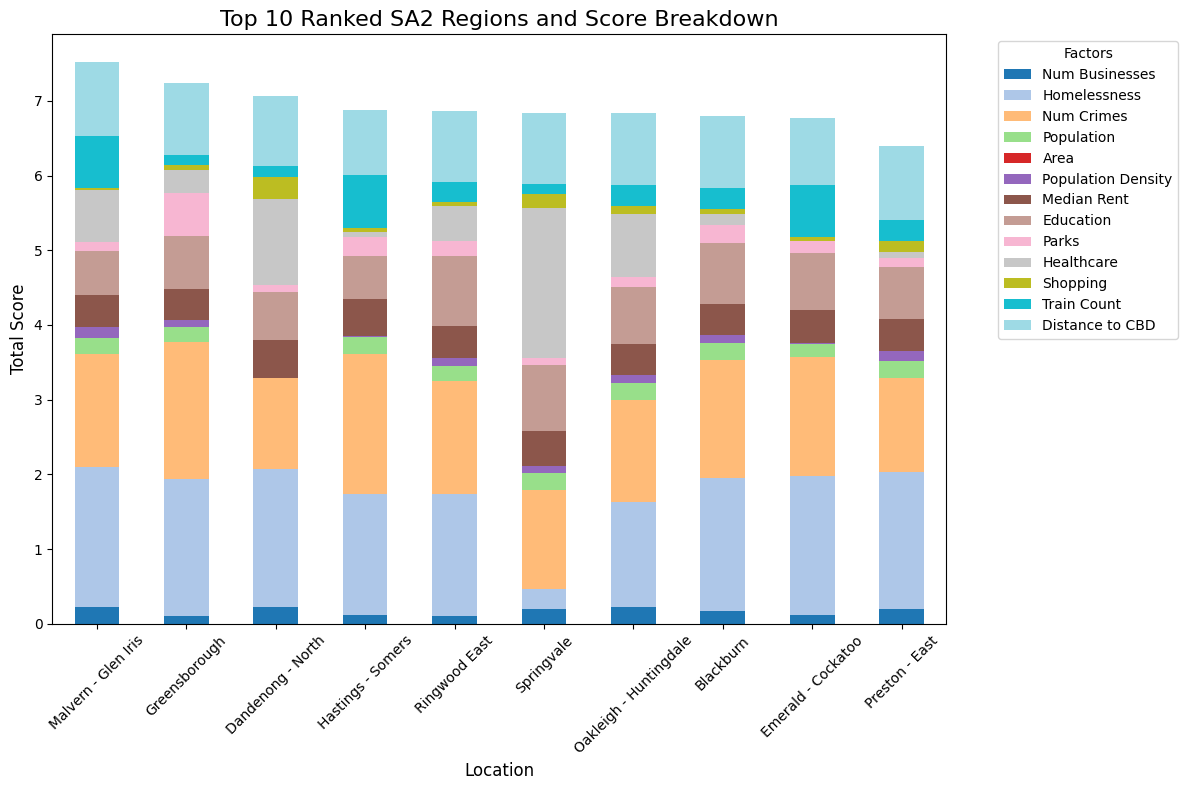

In [ ]:
# Define the factors to be included in the stacked bar plot
factors = [col + '_contrib' for col in weights.keys()]
factor_labels = ['Num Businesses', 'Homelessness', 'Num Crimes', 'Population', 'Area', 'Population Density',
                 'Median Rent', 'Education', 'Parks', 'Healthcare', 'Shopping', 'Train Count', 'Distance to CBD']

# Plot a stacked bar chart for the top 10 locations
fig, ax = plt.subplots(figsize=(12, 8))

base_df.set_index('SA2_name_2021')[factors].plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# Add titles and labels
ax.set_title('Top 10 Ranked SA2 Regions and Score Breakdown', fontsize=16)
ax.set_ylabel('Total Score', fontsize=12)
ax.set_xlabel('Location', fontsize=12)
plt.xticks(rotation=45)
plt.legend(factor_labels, title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()